In [79]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import timedelta
import statsmodels.api as sm
import time

### Preprocessing option_data_25.csv

In [2]:
df = pd.read_csv('option_data_fb_antm.csv')
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['exdate'] = pd.to_datetime(df['exdate'].astype(str), format='%Y%m%d')
df.tail()

,date,exdate,cp_flag,strike_price,volume,impl_volatility,optionid,ticker,index_flag,issuer,exercise_style
53076072,2021-12-31,2024-01-19,P,75000,0,0.564813,142636099,BABA,0,ALIBABA GROUP HOLDING LTD,A
53076073,2021-12-31,2024-01-19,P,80000,0,0.548589,142583175,BABA,0,ALIBABA GROUP HOLDING LTD,A
53076074,2021-12-31,2024-01-19,P,85000,0,0.507037,142583176,BABA,0,ALIBABA GROUP HOLDING LTD,A
53076075,2021-12-31,2024-01-19,P,90000,0,0.495176,142583177,BABA,0,ALIBABA GROUP HOLDING LTD,A
53076076,2021-12-31,2024-01-19,P,95000,0,0.509424,142583178,BABA,0,ALIBABA GROUP HOLDING LTD,A


In [3]:
df['date2'] = df['date'].copy()
del df['optionid']
del df['issuer']
del df['index_flag']
df = df.set_index(['date'])
df['T'] = df['exdate'] - df['date2'] # T: 옵션 만기일 - 당일
df = df.dropna()
df['strike_price'] = df.loc[:, 'strike_price'] / 1000
df['impl_volatility'] = df.loc[:, 'impl_volatility'] * 100
df = df[df['T']<=dt.timedelta(30)]
df = df[df['T']>=dt.timedelta(10)]
df = df[df['volume']!=0]
df['spot'] = ''
df

,exdate,cp_flag,strike_price,volume,impl_volatility,ticker,exercise_style,date2,T,spot
date,,,,,,,,,,
2016-01-04,2016-01-15,C,35.0,5,37.6614,ATVI,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,36.0,130,35.5271,ATVI,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,37.0,57,34.5778,ATVI,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,37.5,105,33.6944,ATVI,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,38.0,426,32.8369,ATVI,A,2016-01-04,11 days,
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2022-01-28,P,175.0,1,55.1505,BABA,A,2021-12-31,28 days,
2021-12-31,2022-01-28,P,80.0,32,81.4404,BABA,A,2021-12-31,28 days,
2021-12-31,2022-01-28,P,85.0,38,80.1066,BABA,A,2021-12-31,28 days,


#### ANTM을 ELV로, FB을 META로 티커 변경

In [4]:
df.loc[df.ticker=='ANTM','ticker']='ELV'
df[df.ticker=='ELV']

,exdate,cp_flag,strike_price,volume,impl_volatility,ticker,exercise_style,date2,T,spot
date,,,,,,,,,,
2016-01-04,2016-01-15,C,137.0,8,28.6967,ELV,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,138.0,3,28.0516,ELV,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,139.0,21,28.3937,ELV,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,140.0,10,27.7632,ELV,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,141.0,307,26.9698,ELV,A,2016-01-04,11 days,
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2022-01-21,P,460.0,10,20.4082,ELV,A,2021-12-31,21 days,
2021-12-31,2022-01-21,P,465.0,2,19.9649,ELV,A,2021-12-31,21 days,
2021-12-31,2022-01-21,P,470.0,11,19.6432,ELV,A,2021-12-31,21 days,


In [5]:
df.loc[df.ticker=='FB','ticker']='META'
df[df.ticker=='META']

,exdate,cp_flag,strike_price,volume,impl_volatility,ticker,exercise_style,date2,T,spot
date,,,,,,,,,,
2016-01-04,2016-01-15,C,100.0,7718,32.6777,META,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,101.0,1342,31.7671,META,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,102.0,3934,30.9992,META,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,103.0,3918,30.2886,META,A,2016-01-04,11 days,
2016-01-04,2016-01-15,C,104.0,3806,29.7307,META,A,2016-01-04,11 days,
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2022-01-28,P,330.0,133,34.2408,META,A,2021-12-31,28 days,
2021-12-31,2022-01-28,P,335.0,225,33.7140,META,A,2021-12-31,28 days,
2021-12-31,2022-01-28,P,340.0,69,33.4935,META,A,2021-12-31,28 days,


In [6]:
df.ticker.unique() # 25 stocks

array(['ATVI', 'AMZN', 'AAPL', 'BA', 'KO', 'DIS', 'XOM', 'F', 'GE', 'GS',
       'INTC', 'MCD', 'MSFT', 'NVDA', 'PFE', 'SBUX', 'UNH', 'WMT', 'ELV',
       'GOOGL', 'TSLA', 'GM', 'META', 'AAL', 'BABA'], dtype=object)

In [7]:
len(df.ticker.unique())

25

### 수정 전 종가

In [8]:
stock_list = list(df.ticker.unique())
stock_list

['ATVI',
 'AMZN',
 'AAPL',
 'BA',
 'KO',
 'DIS',
 'XOM',
 'F',
 'GE',
 'GS',
 'INTC',
 'MCD',
 'MSFT',
 'NVDA',
 'PFE',
 'SBUX',
 'UNH',
 'WMT',
 'ELV',
 'GOOGL',
 'TSLA',
 'GM',
 'META',
 'AAL',
 'BABA']

In [9]:
df_not = pdr.get_data_yahoo(stock_list, start='2016-01-04', end='2022-01-02')
df_not = df_not['Close']

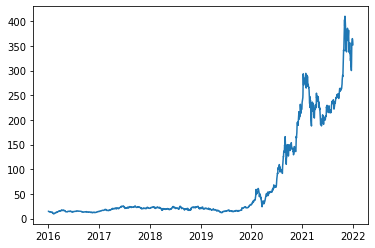

In [10]:
plt.plot(df_not['TSLA']) # 액면 분할 이미 반영됨

In [11]:
for i in stock_list:
    print("df_{} = df[df.ticker == '{}']".format(i,i))

df_ATVI = df[df.ticker == 'ATVI']
df_AMZN = df[df.ticker == 'AMZN']
df_AAPL = df[df.ticker == 'AAPL']
df_BA = df[df.ticker == 'BA']
df_KO = df[df.ticker == 'KO']
df_DIS = df[df.ticker == 'DIS']
df_XOM = df[df.ticker == 'XOM']
df_F = df[df.ticker == 'F']
df_GE = df[df.ticker == 'GE']
df_GS = df[df.ticker == 'GS']
df_INTC = df[df.ticker == 'INTC']
df_MCD = df[df.ticker == 'MCD']
df_MSFT = df[df.ticker == 'MSFT']
df_NVDA = df[df.ticker == 'NVDA']
df_PFE = df[df.ticker == 'PFE']
df_SBUX = df[df.ticker == 'SBUX']
df_UNH = df[df.ticker == 'UNH']
df_WMT = df[df.ticker == 'WMT']
df_ELV = df[df.ticker == 'ELV']
df_GOOGL = df[df.ticker == 'GOOGL']
df_TSLA = df[df.ticker == 'TSLA']
df_GM = df[df.ticker == 'GM']
df_META = df[df.ticker == 'META']
df_AAL = df[df.ticker == 'AAL']
df_BABA = df[df.ticker == 'BABA']


In [12]:
df_ATVI = df[df.ticker == 'ATVI']
df_AMZN = df[df.ticker == 'AMZN']
df_AAPL = df[df.ticker == 'AAPL']
df_BA = df[df.ticker == 'BA']
df_KO = df[df.ticker == 'KO']
df_DIS = df[df.ticker == 'DIS']
df_XOM = df[df.ticker == 'XOM']
df_F = df[df.ticker == 'F']
df_GE = df[df.ticker == 'GE']
df_GS = df[df.ticker == 'GS']
df_INTC = df[df.ticker == 'INTC']
df_MCD = df[df.ticker == 'MCD']
df_MSFT = df[df.ticker == 'MSFT']
df_NVDA = df[df.ticker == 'NVDA']
df_PFE = df[df.ticker == 'PFE']
df_SBUX = df[df.ticker == 'SBUX']
df_UNH = df[df.ticker == 'UNH']
df_WMT = df[df.ticker == 'WMT']
df_ELV = df[df.ticker == 'ELV']
df_GOOGL = df[df.ticker == 'GOOGL']
df_TSLA = df[df.ticker == 'TSLA']
df_GM = df[df.ticker == 'GM']
df_META = df[df.ticker == 'META']
df_AAL = df[df.ticker == 'AAL']
df_BABA = df[df.ticker == 'BABA']

In [13]:
for i in stock_list:
    print("df_{}.spot = df_not.{}.copy()".format(i,i))

df_ATVI.spot = df_not.ATVI.copy()
df_AMZN.spot = df_not.AMZN.copy()
df_AAPL.spot = df_not.AAPL.copy()
df_BA.spot = df_not.BA.copy()
df_KO.spot = df_not.KO.copy()
df_DIS.spot = df_not.DIS.copy()
df_XOM.spot = df_not.XOM.copy()
df_F.spot = df_not.F.copy()
df_GE.spot = df_not.GE.copy()
df_GS.spot = df_not.GS.copy()
df_INTC.spot = df_not.INTC.copy()
df_MCD.spot = df_not.MCD.copy()
df_MSFT.spot = df_not.MSFT.copy()
df_NVDA.spot = df_not.NVDA.copy()
df_PFE.spot = df_not.PFE.copy()
df_SBUX.spot = df_not.SBUX.copy()
df_UNH.spot = df_not.UNH.copy()
df_WMT.spot = df_not.WMT.copy()
df_ELV.spot = df_not.ELV.copy()
df_GOOGL.spot = df_not.GOOGL.copy()
df_TSLA.spot = df_not.TSLA.copy()
df_GM.spot = df_not.GM.copy()
df_META.spot = df_not.META.copy()
df_AAL.spot = df_not.AAL.copy()
df_BABA.spot = df_not.BABA.copy()


In [14]:
df_ATVI.spot = df_not.ATVI.copy()
df_AMZN.spot = df_not.AMZN.copy()
df_AAPL.spot = df_not.AAPL.copy()
df_BA.spot = df_not.BA.copy()
df_KO.spot = df_not.KO.copy()
df_DIS.spot = df_not.DIS.copy()
df_XOM.spot = df_not.XOM.copy()
df_F.spot = df_not.F.copy()
df_GE.spot = df_not.GE.copy()
df_GS.spot = df_not.GS.copy()
df_INTC.spot = df_not.INTC.copy()
df_MCD.spot = df_not.MCD.copy()
df_MSFT.spot = df_not.MSFT.copy()
df_NVDA.spot = df_not.NVDA.copy()
df_PFE.spot = df_not.PFE.copy()
df_SBUX.spot = df_not.SBUX.copy()
df_UNH.spot = df_not.UNH.copy()
df_WMT.spot = df_not.WMT.copy()
df_ELV.spot = df_not.ELV.copy()
df_GOOGL.spot = df_not.GOOGL.copy()
df_TSLA.spot = df_not.TSLA.copy()
df_GM.spot = df_not.GM.copy()
df_META.spot = df_not.META.copy()
df_AAL.spot = df_not.AAL.copy()
df_BABA.spot = df_not.BABA.copy()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df_META.loc['2021-12-31'].head(30)

,exdate,cp_flag,strike_price,volume,impl_volatility,ticker,exercise_style,date2,T,spot
date,,,,,,,,,,
2021-12-31,2022-01-14,C,200.0,7,123.9348,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,230.0,3,90.4319,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,270.0,3,61.1814,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,300.0,48,39.6575,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,310.0,1,34.8246,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,312.5,3,33.8414,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,315.0,102,33.2832,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,317.5,1,32.5475,META,A,2021-12-31,14 days,336.350006
2021-12-31,2022-01-14,C,320.0,10,31.7699,META,A,2021-12-31,14 days,336.350006


### Caculating Return
start = '2014-06-04'
end = '2022-02-27'

In [16]:
for i in range(len(stock_list)):
    stock = pd.DataFrame(pdr.get_data_yahoo(stock_list[i], start='2014-06-04', end='2022-02-27')['Close'])
    stock.columns = [stock_list[i]]
    
    if i == 0:
        df_stocks = stock
    else:
        df_stocks = pd.concat([df_stocks, stock], axis=1)
df_stocks

,ATVI,AMZN,AAPL,BA,KO,DIS,XOM,F,GE,GS,...,SBUX,UNH,WMT,ELV,GOOGL,TSLA,GM,META,AAL,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-03,20.750000,15.359500,22.769285,135.880005,40.880001,83.879997,100.389999,16.549999,206.076920,161.800003,...,37.090000,79.879997,76.709999,108.010002,27.725500,13.662666,35.259998,62.869999,41.439999,NaN
2014-06-04,20.730000,15.339000,23.029285,135.330002,40.790001,84.239998,100.040001,16.790001,204.230774,162.389999,...,37.334999,80.510002,77.129997,108.629997,27.688000,13.599333,36.520000,63.340000,42.820000,NaN
2014-06-05,20.709999,16.178499,23.119642,136.820007,40.889999,84.779999,100.550003,16.680000,205.923080,162.580002,...,37.360001,79.800003,77.320000,107.260002,28.246500,13.793333,36.270000,63.189999,42.410000,NaN
2014-06-06,20.920000,16.483500,23.056070,138.250000,40.990002,84.610001,101.599998,17.080000,209.076920,166.190002,...,37.665001,79.930000,77.209999,106.129997,28.301500,13.878066,36.549999,62.500000,43.880001,NaN
2014-06-09,21.290001,16.375000,23.424999,137.960007,40.910000,85.480003,101.519997,17.000000,211.076920,166.000000,...,37.590000,79.760002,77.010002,105.279999,28.536501,13.687333,36.500000,62.880001,43.590000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,81.050003,152.601501,167.300003,209.029999,62.540001,151.360001,77.360001,18.040001,92.690002,346.040009,...,93.339996,467.809998,137.990005,446.239990,130.403000,285.660004,48.599998,206.160004,17.870001,118.989998
2022-02-22,81.230003,150.197495,164.320007,198.740005,62.279999,148.089996,76.459999,17.290001,94.150002,344.269989,...,93.110001,462.510010,136.449997,444.010010,129.813507,273.843323,46.770000,202.080002,17.430000,112.930000
2022-02-23,80.709999,144.826996,160.070007,196.419998,61.590000,145.869995,76.769997,16.950001,92.650002,341.190002,...,89.650002,459.619995,135.050003,442.529999,127.587997,254.679993,46.380001,198.449997,16.639999,109.720001


### 1st Factor: L6.ret
### Calculating Momentum

In [17]:
df_weekly =  df_stocks.resample('W').last().dropna()
df_weekly = df_weekly.pct_change()

rolling = df_weekly.rolling(4).sum()/4 # 직전 한 달 누적 수익률

L6 = rolling.shift(4)*100
L6 = L6.dropna()

L6

,ATVI,AMZN,AAPL,BA,KO,DIS,XOM,F,GE,GS,...,SBUX,UNH,WMT,ELV,GOOGL,TSLA,GM,META,AAL,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16,-3.515591,-2.149701,-0.813295,-1.183714,0.523904,-1.888427,-1.554596,-4.098121,-1.397623,-1.249769,...,-0.836290,0.124621,-0.866938,-1.458746,-3.568203,-3.141159,-2.733375,-0.566021,-1.917946,-1.604549
2014-11-23,-2.438118,-2.902858,1.171234,-1.259009,-0.643869,0.020556,-0.220542,-4.045602,0.055940,-0.194696,...,0.231179,1.447255,0.016165,-0.069850,-1.605986,-1.062054,-2.331540,0.705257,3.383051,1.541151
2014-11-30,-0.785607,-1.264051,2.112151,-0.260312,-0.599887,0.883769,0.762400,-0.819384,0.446043,0.312284,...,-0.090722,2.534051,-0.291117,1.014962,-0.671820,-1.248391,-1.644396,-0.626647,4.134884,2.934809
2014-12-07,2.505877,-0.843186,2.067389,0.609159,-1.191884,1.122393,1.348926,0.693363,2.139416,1.429252,...,1.118180,2.348765,0.214708,1.562318,-0.053888,0.389100,1.076486,1.039136,9.014081,7.611428
2014-12-14,1.652951,2.110113,4.012517,1.137033,-0.055821,2.051697,1.067128,1.987756,1.620204,1.814485,...,1.533126,1.932522,2.882505,2.224957,1.549644,3.307601,1.276033,-0.241339,7.371069,7.138328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30,3.791789,-0.398389,2.496372,0.461257,2.560824,1.486449,0.170013,2.308157,0.530288,0.002616,...,1.383172,2.838349,1.301085,4.121830,0.560585,1.338892,-0.169688,2.364279,2.140866,1.656485
2022-02-06,2.315676,-1.424224,-0.984173,1.394638,1.754302,0.851350,2.441444,3.708342,1.237762,0.436152,...,-1.859711,-0.937915,0.695687,0.303567,-1.847986,0.582706,-0.082999,0.158738,1.887432,1.050551
2022-02-13,1.665215,-1.169627,0.304217,4.123505,1.549450,0.565036,4.709019,6.433569,3.089945,-0.013980,...,-1.856367,-0.852606,1.129189,0.471358,-0.338290,3.210235,2.631103,-0.139268,2.334457,1.981226


### 2nd Factor: RVIV Spread
### Calculating Realized Volatility

In [18]:
wrdsvol = pd.read_csv('historical_vol_fb_antm.csv')
wrdsvol

,secid,date,days,volatility,ticker,index_flag,class
0,101029,20151228,10,0.126663,ATVI,0,NaN
1,101029,20151228,14,0.172159,ATVI,0,NaN
2,101029,20151228,30,0.262873,ATVI,0,NaN
3,101029,20151228,60,0.315432,ATVI,0,NaN
4,101029,20151228,91,0.273149,ATVI,0,NaN
...,...,...,...,...,...,...,...
492370,205204,20211231,273,0.454361,BABA,0,NaN
492371,205204,20211231,365,0.442804,BABA,0,NaN
492372,205204,20211231,547,0.443842,BABA,0,NaN
492373,205204,20211231,730,0.429488,BABA,0,NaN


In [19]:
wrdsvol.ticker.unique()

array(['ATVI', 'AMZN', 'AAPL', 'BA', 'KO', 'DIS', 'XOM', 'F', 'GE', 'GS',
       'INTC', 'MCD', 'MSFT', 'NVDA', 'PFE', 'SBUX', 'UNH', 'WMT', 'ANTM',
       'GOOGL', 'TSLA', 'GM', 'FB', 'AAL', 'BABA'], dtype=object)

In [20]:
len(wrdsvol.ticker.unique())

25

#### ANTM을 ELV로, FB을 META로 티커 변경

In [21]:
wrdsvol.loc[wrdsvol.ticker=='ANTM','ticker']='ELV'
wrdsvol[wrdsvol.ticker=='ELV']

,secid,date,days,volatility,ticker,index_flag,class
354510,113119,20151228,10,0.098118,ELV,0,NaN
354511,113119,20151228,14,0.145681,ELV,0,NaN
354512,113119,20151228,30,0.241230,ELV,0,NaN
354513,113119,20151228,60,0.281916,ELV,0,NaN
354514,113119,20151228,91,0.280449,ELV,0,NaN
...,...,...,...,...,...,...,...
374200,113119,20211231,273,0.226139,ELV,0,NaN
374201,113119,20211231,365,0.246948,ELV,0,NaN
374202,113119,20211231,547,0.278492,ELV,0,NaN
374203,113119,20211231,730,0.424443,ELV,0,NaN


In [22]:
wrdsvol.loc[wrdsvol.ticker=='FB','ticker']='META'
wrdsvol[wrdsvol.ticker=='META']

,secid,date,days,volatility,ticker,index_flag,class
433290,154402,20151228,10,0.109991,META,0,NaN
433291,154402,20151228,14,0.190316,META,0,NaN
433292,154402,20151228,30,0.251864,META,0,NaN
433293,154402,20151228,60,0.270241,META,0,NaN
433294,154402,20151228,91,0.260435,META,0,NaN
...,...,...,...,...,...,...,...
452980,154402,20211231,273,0.282702,META,0,NaN
452981,154402,20211231,365,0.295440,META,0,NaN
452982,154402,20211231,547,0.325441,META,0,NaN
452983,154402,20211231,730,0.386776,META,0,NaN


In [23]:
wrdsvol.ticker.unique()

array(['ATVI', 'AMZN', 'AAPL', 'BA', 'KO', 'DIS', 'XOM', 'F', 'GE', 'GS',
       'INTC', 'MCD', 'MSFT', 'NVDA', 'PFE', 'SBUX', 'UNH', 'WMT', 'ELV',
       'GOOGL', 'TSLA', 'GM', 'META', 'AAL', 'BABA'], dtype=object)

In [24]:
wrdsvol['date'] = pd.to_datetime(wrdsvol['date'].astype(str), format='%Y%m%d')
wrdsvol

,secid,date,days,volatility,ticker,index_flag,class
0,101029,2015-12-28,10,0.126663,ATVI,0,NaN
1,101029,2015-12-28,14,0.172159,ATVI,0,NaN
2,101029,2015-12-28,30,0.262873,ATVI,0,NaN
3,101029,2015-12-28,60,0.315432,ATVI,0,NaN
4,101029,2015-12-28,91,0.273149,ATVI,0,NaN
...,...,...,...,...,...,...,...
492370,205204,2021-12-31,273,0.454361,BABA,0,NaN
492371,205204,2021-12-31,365,0.442804,BABA,0,NaN
492372,205204,2021-12-31,547,0.443842,BABA,0,NaN
492373,205204,2021-12-31,730,0.429488,BABA,0,NaN


In [25]:
wrdsvol['date2'] = wrdsvol['date'].copy()
wrdsvol = wrdsvol.set_index('date')
wrdsvol = wrdsvol[wrdsvol.days==30]
del wrdsvol['secid']
del wrdsvol['index_flag']
del wrdsvol['class']
wrdsvol.volatility = wrdsvol.volatility * 100
wrdsvol

,days,volatility,ticker,date2
date,,,,
2015-12-28,30,26.2873,ATVI,2015-12-28
2015-12-29,30,25.9374,ATVI,2015-12-29
2015-12-30,30,25.8523,ATVI,2015-12-30
2015-12-31,30,25.5320,ATVI,2015-12-31
2016-01-04,30,24.8344,ATVI,2016-01-04
...,...,...,...,...
2021-12-27,30,66.3406,BABA,2021-12-27
2021-12-28,30,64.7320,BABA,2021-12-28
2021-12-29,30,64.9644,BABA,2021-12-29


In [26]:
zzang = []
for z in stock_list:
    print('Loading {} volatility'.format(z))
    gu = wrdsvol[wrdsvol.ticker == z]['volatility']
    gu.columns = [z]
    zzang.append(gu)
print('Data loading is completed!')
df_wrdsvol = pd.concat(zzang,axis=1)
df_wrdsvol.columns = stock_list
df_wrdsvol

Loading ATVI volatility
Loading AMZN volatility
Loading AAPL volatility
Loading BA volatility
Loading KO volatility
Loading DIS volatility
Loading XOM volatility
Loading F volatility
Loading GE volatility
Loading GS volatility
Loading INTC volatility
Loading MCD volatility
Loading MSFT volatility
Loading NVDA volatility
Loading PFE volatility
Loading SBUX volatility
Loading UNH volatility
Loading WMT volatility
Loading ELV volatility
Loading GOOGL volatility
Loading TSLA volatility
Loading GM volatility
Loading META volatility
Loading AAL volatility
Loading BABA volatility
Data loading is completed!


,ATVI,AMZN,AAPL,BA,KO,DIS,XOM,F,GE,GS,...,SBUX,UNH,WMT,ELV,GOOGL,TSLA,GM,META,AAL,BABA
date,,,,,,,,,,,,,,,,,,,,,
2015-12-28,26.2873,24.4577,23.5470,26.0305,17.3166,26.3955,30.6092,28.2889,14.9823,32.0866,...,24.5349,23.9144,18.8297,24.1230,21.3885,33.1273,23.8214,25.1864,38.8208,34.2509
2015-12-29,25.9374,25.6426,24.2617,26.3078,16.9549,25.7335,29.9291,27.6215,15.0890,31.5806,...,24.6383,23.5956,18.8913,23.7380,21.4203,34.6051,23.2268,24.9128,37.8687,33.6896
2015-12-30,25.8523,25.3282,24.2860,26.1492,16.3585,25.4434,30.1139,27.2552,14.3838,31.6480,...,24.3089,23.0972,17.5275,23.7310,20.9990,34.5211,23.2307,24.8080,38.1632,32.3282
2015-12-31,25.5320,25.2852,24.7969,25.8886,17.0448,24.5907,30.0607,26.6315,14.2491,31.0569,...,24.6991,21.1097,17.7922,20.0678,19.6642,33.0895,23.3232,23.4162,34.5476,32.3523
2016-01-04,24.8344,33.6955,21.8791,27.7080,16.8158,24.0804,29.5304,25.5660,14.9539,29.7642,...,22.1214,18.0119,18.0341,14.4481,21.1797,42.9581,23.2266,24.2791,34.3124,36.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,21.5529,24.3451,31.9858,46.7343,21.9192,25.5982,22.4277,49.0293,32.4035,29.0125,...,26.0299,18.9918,23.2075,21.5761,23.5539,65.9901,48.9410,36.0332,59.5076,66.3406
2021-12-28,21.6103,23.8682,31.4882,45.7897,21.3663,25.4188,21.8985,47.8135,31.7294,28.2809,...,25.6141,18.5113,23.2484,21.1004,23.2306,64.3480,47.7151,35.1264,58.3727,64.7320
2021-12-29,21.3380,23.1231,31.0459,46.0048,21.0170,25.4209,22.0323,47.9483,31.6570,28.1881,...,25.6637,16.9302,22.5761,21.0664,21.8384,61.7927,47.7300,35.0141,59.2225,64.9644


In [27]:
df_wrdsvol = df_wrdsvol.rename(
    columns = {"ATVI":"ATVI_VOL", "AMZN":"AMZN_VOL","AAPL":"AAPL_VOL", "BA":"BA_VOL", "KO":"KO_VOL", 
            "DIS":"DIS_VOL", "XOM":"XOM_VOL", "F":"F_VOL", "GE":"GE_VOL", "GS":"GS_VOL", 
            "INTC":"INTC_VOL", "MCD":"MCD_VOL","MSFT":"MSFT_VOL","NVDA":"NVDA_VOL", "PFE":"PFE_VOL",
            "SBUX":"SBUX_VOL", "UNH":"UNH_VOL","WMT":"WMT_VOL", "ELV":"ELV_VOL", "GOOGL":"GOOGL_VOL", 
            "TSLA":"TSLA_VOL", "GM":"GM_VOL", "META":"META_VOL", "AAL":"AAL_VOL", "BABA":"BABA_VOL"})
df_wrdsvol

,ATVI_VOL,AMZN_VOL,AAPL_VOL,BA_VOL,KO_VOL,DIS_VOL,XOM_VOL,F_VOL,GE_VOL,GS_VOL,...,SBUX_VOL,UNH_VOL,WMT_VOL,ELV_VOL,GOOGL_VOL,TSLA_VOL,GM_VOL,META_VOL,AAL_VOL,BABA_VOL
date,,,,,,,,,,,,,,,,,,,,,
2015-12-28,26.2873,24.4577,23.5470,26.0305,17.3166,26.3955,30.6092,28.2889,14.9823,32.0866,...,24.5349,23.9144,18.8297,24.1230,21.3885,33.1273,23.8214,25.1864,38.8208,34.2509
2015-12-29,25.9374,25.6426,24.2617,26.3078,16.9549,25.7335,29.9291,27.6215,15.0890,31.5806,...,24.6383,23.5956,18.8913,23.7380,21.4203,34.6051,23.2268,24.9128,37.8687,33.6896
2015-12-30,25.8523,25.3282,24.2860,26.1492,16.3585,25.4434,30.1139,27.2552,14.3838,31.6480,...,24.3089,23.0972,17.5275,23.7310,20.9990,34.5211,23.2307,24.8080,38.1632,32.3282
2015-12-31,25.5320,25.2852,24.7969,25.8886,17.0448,24.5907,30.0607,26.6315,14.2491,31.0569,...,24.6991,21.1097,17.7922,20.0678,19.6642,33.0895,23.3232,23.4162,34.5476,32.3523
2016-01-04,24.8344,33.6955,21.8791,27.7080,16.8158,24.0804,29.5304,25.5660,14.9539,29.7642,...,22.1214,18.0119,18.0341,14.4481,21.1797,42.9581,23.2266,24.2791,34.3124,36.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,21.5529,24.3451,31.9858,46.7343,21.9192,25.5982,22.4277,49.0293,32.4035,29.0125,...,26.0299,18.9918,23.2075,21.5761,23.5539,65.9901,48.9410,36.0332,59.5076,66.3406
2021-12-28,21.6103,23.8682,31.4882,45.7897,21.3663,25.4188,21.8985,47.8135,31.7294,28.2809,...,25.6141,18.5113,23.2484,21.1004,23.2306,64.3480,47.7151,35.1264,58.3727,64.7320
2021-12-29,21.3380,23.1231,31.0459,46.0048,21.0170,25.4209,22.0323,47.9483,31.6570,28.1881,...,25.6637,16.9302,22.5761,21.0664,21.8384,61.7927,47.7300,35.0141,59.2225,64.9644


In [28]:
df_wrdsvol.columns

Index(['ATVI_VOL', 'AMZN_VOL', 'AAPL_VOL', 'BA_VOL', 'KO_VOL', 'DIS_VOL',
       'XOM_VOL', 'F_VOL', 'GE_VOL', 'GS_VOL', 'INTC_VOL', 'MCD_VOL',
       'MSFT_VOL', 'NVDA_VOL', 'PFE_VOL', 'SBUX_VOL', 'UNH_VOL', 'WMT_VOL',
       'ELV_VOL', 'GOOGL_VOL', 'TSLA_VOL', 'GM_VOL', 'META_VOL', 'AAL_VOL',
       'BABA_VOL'],
      dtype='object')

### 3rd Factor: Skew

In [29]:
for k in stock_list:
    lst = globals()['df_{}'.format(k)].index.unique().tolist()
    lst = pd.to_datetime(lst)

    for z in range(313):
        temp = []
        for u in lst[1:7] + timedelta(weeks=z):
            if u in lst:
                temp.append(u)

        globals()['week{}'.format(z)] = globals()['df_{}'.format(k)].loc[temp]
        globals()['week{}'.format(z)] = globals()['week{}'.format(z)].reset_index()

    temp_date = None
    c_val = 0
    p_val = 0
    cnt = 0
    total = 0
    c_diff = p_diff = 0
    imvol = 0
    #날짜별로 sorting되어 있다고 가정 
    for j in range(313):
        imvol = 0
        cnt = 0
        total = 0
        for i in range(len(globals()['week{}'.format(j)])):

            if(temp_date != globals()['week{}'.format(j)].loc[i,"date"]):
                if(c_val != 0 and p_val != 0):
                    total += (p_val - c_val)
                    cnt += 1
                    imvol += c_val
                temp_date = globals()['week{}'.format(j)].loc[i,"date"]
                c_diff = p_diff = 100000000
                c_val = p_val = 0
                #imvol = 0
            elif(globals()['week{}'.format(j)].loc[i,"cp_flag"] == "C"):
                if(globals()['week{}'.format(j)].loc[i,"strike_price"] >= globals()['week{}'.format(j)].loc[i,"spot"]):
                    if(c_diff > (globals()['week{}'.format(j)].loc[i,"strike_price"] - globals()['week{}'.format(j)].loc[i,"spot"])):
                        c_diff = globals()['week{}'.format(j)].loc[i,"strike_price"] - globals()['week{}'.format(j)].loc[i,"spot"]
                        c_val = globals()['week{}'.format(j)].loc[i,"impl_volatility"]
                else:
                    if(c_diff > (globals()['week{}'.format(j)].loc[i,"spot"]-globals()['week{}'.format(j)].loc[i,"strike_price"])):
                        c_diff = globals()['week{}'.format(j)].loc[i,"spot"]-globals()['week{}'.format(j)].loc[i,"strike_price"]
                        c_val = globals()['week{}'.format(j)].loc[i,"impl_volatility"]

            else:
                if(globals()['week{}'.format(j)].loc[i,"strike_price"] >= (globals()['week{}'.format(j)].loc[i,"spot"]*0.95)):
                    if(p_diff > (globals()['week{}'.format(j)].loc[i,"strike_price"] - 0.95*globals()['week{}'.format(j)].loc[i,"spot"])):
                        p_diff = globals()['week{}'.format(j)].loc[i,"strike_price"] - 0.95*globals()['week{}'.format(j)].loc[i,"spot"]
                        p_val = globals()['week{}'.format(j)].loc[i,"impl_volatility"]
                else:
                    if(p_diff > (0.95*globals()['week{}'.format(j)].loc[i,"spot"]-globals()['week{}'.format(j)].loc[i,"strike_price"])):
                        p_diff = 0.95*globals()['week{}'.format(j)].loc[i,"spot"]-globals()['week{}'.format(j)].loc[i,"strike_price"]
                        p_val = globals()['week{}'.format(j)].loc[i,"impl_volatility"]


       # globals()['skew_week{}'.format(j)] = []
        if(cnt):
            globals()['skew_week{}_{}'.format(j,k)] = total/cnt
            globals()['imvol_week{}_{}'.format(j,k)] = imvol/cnt
        else:
            globals()['skew_week{}_{}'.format(j,k)] = 0
            globals()['imvol_week{}_{}'.format(j,k)] = 0
        #print(total/cnt)

In [30]:
for i in range(313):
    globals()['skew_week{}'.format(i)] = []
    globals()['imvol_week{}'.format(i)] = []
    for j in stock_list:
        globals()['skew_week{}'.format(i)].append(globals()['skew_week{}_{}'.format(i,j)])
        globals()['imvol_week{}'.format(i)].append(globals()['imvol_week{}_{}'.format(i,j)])

sk = []
im = []
for i in range(313):
    sk.append(globals()['skew_week{}'.format(i)])
    im.append(globals()['imvol_week{}'.format(i)])
skew = pd.DataFrame(sk)
imvol = pd.DataFrame(im)

In [31]:
skew = skew.rename(
    columns = {0:"ATVI_skew", 1:"AMZN_skew",2:"AAPL_skew", 3:"BA_skew", 4:"KO_skew", 
            5:"DIS_skew", 6:"XOM_skew", 7:"F_skew", 8:"GE_skew", 9:"GS_skew", 
            10:"INTC_skew", 11:"MCD_skew", 12:"MSFT_skew", 13:"NVDA_skew", 14:"PFE_skew",
            15:"SBUX_skew", 16:"UNH_skew", 17:"WMT_skew", 18:"ELV_skew", 19:"GOOGL_skew", 
            20:"TSLA_skew", 21:"GM_skew", 22:"META_skew", 23:"AAL_skew", 24:"BABA_skew"})

In [32]:
imvol = imvol.rename(
    columns = {0:"ATVI_imvol", 1:"AMZN_imvol",2:"AAPL_imvol", 3:"BA_imvol", 4:"KO_imvol", 
            5:"DIS_imvol", 6:"XOM_imvol", 7:"F_imvol", 8:"GE_imvol", 9:"GS_imvol", 
            10:"INTC_imvol", 11:"MCD_imvol", 12:"MSFT_imvol", 13:"NVDA_imvol", 14:"PFE_imvol",
            15:"SBUX_imvol", 16:"UNH_imvol", 17:"WMT_imvol", 18:"ELV_imvol", 19:"GOOGL_imvol", 
            20:"TSLA_imvol", 21:"GM_imvol", 22:"META_imvol", 23:"AAL_imvol", 24:"BABA_imvol"})

In [33]:
skew

,ATVI_skew,AMZN_skew,AAPL_skew,BA_skew,KO_skew,DIS_skew,XOM_skew,F_skew,GE_skew,GS_skew,...,SBUX_skew,UNH_skew,WMT_skew,ELV_skew,GOOGL_skew,TSLA_skew,GM_skew,META_skew,AAL_skew,BABA_skew
0,4.658880,-10.625240,6.311680,5.01204,4.245540,3.72090,4.515540,4.790800,-9.772440,3.014140,...,5.095700,4.462540,3.935780,2.175920,12.495180,36.190700,5.350220,6.498080,3.16112,5.950780
1,0.256975,0.701875,-1.743850,3.94125,4.947875,4.51350,6.412550,-0.566975,0.682100,4.021050,...,3.862625,5.218625,3.398775,3.336475,20.756050,24.607850,5.020225,4.445275,2.86430,4.483875
2,-1.099700,16.552840,10.585820,2.40426,3.876800,3.68612,3.877020,-13.699940,7.234880,1.492960,...,2.444060,5.793440,3.203520,1.661800,3.241120,39.722400,4.384600,2.540200,0.23754,-1.405160
3,2.354300,40.119680,18.524780,3.98460,3.769060,4.84254,6.547040,2.922840,26.341820,3.450100,...,6.039100,4.669580,4.354680,3.793460,12.979840,19.819380,4.667680,4.920160,-0.23522,2.782780
4,3.425940,43.612500,5.066760,4.77714,4.812620,4.21964,6.201860,3.621880,21.659860,5.860780,...,5.916660,5.775880,4.415620,5.038280,-2.723340,47.183960,4.968300,4.116680,3.47858,5.830220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1.139000,13.790500,4.686680,3.09108,5.813120,3.46592,4.520020,1.643260,3.316660,3.218000,...,5.653740,5.376980,3.986720,3.584080,27.238820,16.738980,1.788160,3.943240,3.71504,9.732320
309,3.056320,25.089180,3.802920,2.76222,6.227420,2.49992,4.004480,1.696680,3.472600,4.071260,...,6.757140,2.343660,2.789580,2.262680,1.081460,45.192380,2.297480,3.820660,1.79330,5.122540
310,0.616820,-9.553760,0.927760,1.43310,4.319420,2.81644,3.706400,0.075580,2.874320,2.569540,...,5.314800,2.410320,2.105600,1.866740,3.026220,-1.834800,1.887160,2.617740,2.14470,4.152140
311,2.854925,-0.979775,1.723300,2.09420,5.373200,2.38880,3.099600,0.401450,3.043950,3.921575,...,4.733425,3.073425,2.179450,1.813375,-9.689725,49.123475,1.219525,2.093600,1.39435,3.928450


In [34]:
imvol

,ATVI_imvol,AMZN_imvol,AAPL_imvol,BA_imvol,KO_imvol,DIS_imvol,XOM_imvol,F_imvol,GE_imvol,GS_imvol,...,SBUX_imvol,UNH_imvol,WMT_imvol,ELV_imvol,GOOGL_imvol,TSLA_imvol,GM_imvol,META_imvol,AAL_imvol,BABA_imvol
0,35.457280,103.354700,75.539940,27.907100,18.400700,26.74662,28.882620,31.62998,39.828800,34.876900,...,34.960100,31.534140,21.415020,30.704140,49.815920,64.678560,34.497940,35.135100,41.593240,45.415820
1,40.640900,67.551850,74.730150,31.664175,18.786050,28.03225,32.443550,36.78855,31.416675,36.077150,...,37.136725,32.554775,22.183975,34.864850,45.060175,48.528750,34.406425,49.959875,44.707925,56.456425
2,49.297240,69.979260,66.064360,37.708800,21.033640,30.94050,37.471600,44.34794,27.630900,35.694940,...,36.294000,28.550200,24.961460,35.386700,59.246000,60.253660,39.726460,55.603540,50.604300,65.930700
3,46.431660,45.486180,48.178960,28.568300,19.660560,32.51736,30.266140,34.58362,26.857740,30.509460,...,23.852600,26.620960,20.760620,32.596780,47.722500,66.199620,39.276160,39.380560,46.906340,50.563680
4,65.990720,54.382180,62.528660,27.346720,20.060000,40.25848,27.223360,35.06386,29.576040,35.714140,...,30.431560,29.395600,31.566780,34.392680,55.858520,109.822280,37.633360,38.086220,46.514560,45.132740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,43.046240,107.453480,32.022540,46.703100,22.037740,33.31748,35.259500,53.13170,36.703520,36.264220,...,30.384320,27.603420,24.008840,31.449760,78.284080,177.092460,45.177440,40.388600,74.671240,64.112200
309,36.415200,74.132280,32.244180,36.590100,16.013700,26.89574,26.830220,44.74260,28.617560,26.911880,...,22.086660,22.749640,20.085060,24.068360,61.835480,148.368700,38.201940,31.958440,55.877640,57.891640
310,40.046500,88.824020,36.699560,37.825600,17.648780,27.39708,28.395280,48.28308,32.234940,30.184360,...,23.967780,23.094120,20.816680,26.709020,50.349700,178.904320,40.544060,33.671520,55.386600,58.925620
311,34.415100,121.844525,28.070050,33.030825,14.364925,23.74470,24.055400,43.48525,28.818250,24.799075,...,20.860050,21.665800,17.791350,24.425450,115.798475,107.430125,37.532025,29.415850,47.938125,53.146275


## Adjust column names & Merge DFs ( df_use )
### column order: L6, volatility, skew, implied volatility, RVIV

In [35]:
for col in L6.columns:
    L6.rename(columns = {col:col+'_L6'}, inplace = True)
L6

,ATVI_L6,AMZN_L6,AAPL_L6,BA_L6,KO_L6,DIS_L6,XOM_L6,F_L6,GE_L6,GS_L6,...,SBUX_L6,UNH_L6,WMT_L6,ELV_L6,GOOGL_L6,TSLA_L6,GM_L6,META_L6,AAL_L6,BABA_L6
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16,-3.515591,-2.149701,-0.813295,-1.183714,0.523904,-1.888427,-1.554596,-4.098121,-1.397623,-1.249769,...,-0.836290,0.124621,-0.866938,-1.458746,-3.568203,-3.141159,-2.733375,-0.566021,-1.917946,-1.604549
2014-11-23,-2.438118,-2.902858,1.171234,-1.259009,-0.643869,0.020556,-0.220542,-4.045602,0.055940,-0.194696,...,0.231179,1.447255,0.016165,-0.069850,-1.605986,-1.062054,-2.331540,0.705257,3.383051,1.541151
2014-11-30,-0.785607,-1.264051,2.112151,-0.260312,-0.599887,0.883769,0.762400,-0.819384,0.446043,0.312284,...,-0.090722,2.534051,-0.291117,1.014962,-0.671820,-1.248391,-1.644396,-0.626647,4.134884,2.934809
2014-12-07,2.505877,-0.843186,2.067389,0.609159,-1.191884,1.122393,1.348926,0.693363,2.139416,1.429252,...,1.118180,2.348765,0.214708,1.562318,-0.053888,0.389100,1.076486,1.039136,9.014081,7.611428
2014-12-14,1.652951,2.110113,4.012517,1.137033,-0.055821,2.051697,1.067128,1.987756,1.620204,1.814485,...,1.533126,1.932522,2.882505,2.224957,1.549644,3.307601,1.276033,-0.241339,7.371069,7.138328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30,3.791789,-0.398389,2.496372,0.461257,2.560824,1.486449,0.170013,2.308157,0.530288,0.002616,...,1.383172,2.838349,1.301085,4.121830,0.560585,1.338892,-0.169688,2.364279,2.140866,1.656485
2022-02-06,2.315676,-1.424224,-0.984173,1.394638,1.754302,0.851350,2.441444,3.708342,1.237762,0.436152,...,-1.859711,-0.937915,0.695687,0.303567,-1.847986,0.582706,-0.082999,0.158738,1.887432,1.050551
2022-02-13,1.665215,-1.169627,0.304217,4.123505,1.549450,0.565036,4.709019,6.433569,3.089945,-0.013980,...,-1.856367,-0.852606,1.129189,0.471358,-0.338290,3.210235,2.631103,-0.139268,2.334457,1.981226


In [36]:
df_wrdsvol = df_wrdsvol.resample("W").last()
df_wrdsvol = df_wrdsvol.iloc[:-1]
df_wrdsvol

,ATVI_VOL,AMZN_VOL,AAPL_VOL,BA_VOL,KO_VOL,DIS_VOL,XOM_VOL,F_VOL,GE_VOL,GS_VOL,...,SBUX_VOL,UNH_VOL,WMT_VOL,ELV_VOL,GOOGL_VOL,TSLA_VOL,GM_VOL,META_VOL,AAL_VOL,BABA_VOL
date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,25.5320,25.2852,24.7969,25.8886,17.0448,24.5907,30.0607,26.6315,14.2491,31.0569,...,24.6991,21.1097,17.7922,20.0678,19.6642,33.0895,23.3232,23.4162,34.5476,32.3523
2016-01-10,23.4615,34.5124,25.8502,30.8057,17.2429,23.9587,26.6561,31.6356,22.2792,30.6845,...,22.6044,20.7152,21.0728,20.6515,21.8815,42.5860,29.0082,28.6856,32.2894,42.9768
2016-01-17,30.5904,38.5339,29.8984,30.4991,15.2012,27.2372,27.2904,31.9703,24.1750,30.0960,...,26.6642,23.8135,24.5089,32.0270,25.8318,37.3992,27.8175,32.1422,36.0212,42.6671
2016-01-24,34.8107,43.1828,34.7685,29.1618,14.4497,30.0283,32.3513,28.8090,25.8517,29.9999,...,31.0338,26.0764,26.1306,33.5590,28.5840,39.8133,24.9363,36.0348,33.3789,44.7469
2016-01-31,39.2398,58.7462,43.0943,44.5959,15.0745,31.5709,37.6064,31.6745,28.3630,36.2437,...,34.9132,28.5513,27.5887,41.0546,32.4170,37.4098,27.6960,64.7696,37.6650,44.1228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,59.7068,29.4952,22.6532,44.0111,14.0650,30.1397,28.0780,47.1656,28.6497,23.9170,...,35.0135,18.3941,14.6245,19.2858,21.4438,71.2979,36.2935,26.5543,49.4934,54.0152
2021-12-05,31.9150,28.7075,23.7907,52.6056,19.2759,33.5962,29.8667,39.5217,32.5055,25.1040,...,24.5787,20.6778,18.4441,19.1031,21.4022,67.8640,42.6691,32.2464,60.0787,55.5118
2021-12-12,31.8057,26.0853,26.1820,51.5758,23.0635,33.9691,29.0325,46.0099,31.5284,26.8537,...,22.1502,22.2329,20.9200,23.7987,22.5442,54.1994,45.3358,34.5896,62.4937,67.3357


In [37]:
df_merged = L6.join(df_wrdsvol).fillna(method = 'ffill')
df_merged

,ATVI_L6,AMZN_L6,AAPL_L6,BA_L6,KO_L6,DIS_L6,XOM_L6,F_L6,GE_L6,GS_L6,...,SBUX_VOL,UNH_VOL,WMT_VOL,ELV_VOL,GOOGL_VOL,TSLA_VOL,GM_VOL,META_VOL,AAL_VOL,BABA_VOL
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16,-3.515591,-2.149701,-0.813295,-1.183714,0.523904,-1.888427,-1.554596,-4.098121,-1.397623,-1.249769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-23,-2.438118,-2.902858,1.171234,-1.259009,-0.643869,0.020556,-0.220542,-4.045602,0.055940,-0.194696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-30,-0.785607,-1.264051,2.112151,-0.260312,-0.599887,0.883769,0.762400,-0.819384,0.446043,0.312284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-07,2.505877,-0.843186,2.067389,0.609159,-1.191884,1.122393,1.348926,0.693363,2.139416,1.429252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-14,1.652951,2.110113,4.012517,1.137033,-0.055821,2.051697,1.067128,1.987756,1.620204,1.814485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30,3.791789,-0.398389,2.496372,0.461257,2.560824,1.486449,0.170013,2.308157,0.530288,0.002616,...,26.9562,21.1298,22.6846,22.9952,25.0098,64.6264,48.7533,34.6188,66.3754,65.5489
2022-02-06,2.315676,-1.424224,-0.984173,1.394638,1.754302,0.851350,2.441444,3.708342,1.237762,0.436152,...,26.9562,21.1298,22.6846,22.9952,25.0098,64.6264,48.7533,34.6188,66.3754,65.5489
2022-02-13,1.665215,-1.169627,0.304217,4.123505,1.549450,0.565036,4.709019,6.433569,3.089945,-0.013980,...,26.9562,21.1298,22.6846,22.9952,25.0098,64.6264,48.7533,34.6188,66.3754,65.5489


In [38]:
for col in df_weekly.columns:
    df_weekly.rename(columns = {col:col+'_weekly'}, inplace = True)
df_weekly

,ATVI_weekly,AMZN_weekly,AAPL_weekly,BA_weekly,KO_weekly,DIS_weekly,XOM_weekly,F_weekly,GE_weekly,GS_weekly,...,SBUX_weekly,UNH_weekly,WMT_weekly,ELV_weekly,GOOGL_weekly,TSLA_weekly,GM_weekly,META_weekly,AAL_weekly,BABA_weekly
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-28,-0.026123,-0.024478,-0.002080,-0.005102,0.003567,-0.019339,-0.017401,-0.019219,-0.025105,-0.005800,...,-0.011831,-0.013667,-0.004555,-0.010161,-0.028907,-0.049051,-0.022687,0.011295,-0.019110,-0.036532
2014-10-05,-0.025412,-0.001454,-0.011216,-0.018106,0.018957,-0.003268,-0.015823,-0.106552,-0.008974,0.015936,...,0.009578,-0.006697,0.010851,0.010513,-0.002807,0.034915,0.017787,-0.017134,0.008350,-0.026089
2014-10-12,-0.096572,-0.035168,0.011142,-0.038462,0.034186,-0.024647,-0.024702,-0.054832,-0.044488,-0.040889,...,-0.018843,-0.007324,0.012545,-0.041943,-0.052981,-0.071706,-0.102784,-0.058497,-0.150428,-0.025199
2014-10-19,0.007483,-0.024888,-0.030378,0.014321,-0.035754,-0.028283,-0.004258,0.016679,0.022662,-0.019237,...,-0.012356,0.032674,-0.053519,-0.016759,-0.058034,-0.039804,-0.001651,0.041695,0.084470,0.023638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30,-0.027167,0.009359,0.048765,-0.072381,0.006452,0.009099,0.043093,-0.053753,-0.043614,0.009014,...,0.009345,0.010603,-0.019046,0.001200,0.023011,-0.103348,-0.057057,-0.004816,-0.040491,-0.064919
2022-02-06,0.001390,0.094886,0.012094,0.083329,0.001972,0.024454,0.081429,-0.080860,0.075027,0.059335,...,-0.022734,0.036712,0.013162,0.009432,0.074555,0.090943,0.020900,-0.214179,0.051790,0.060661
2022-02-13,0.028391,-0.027569,-0.021753,0.028336,-0.010991,0.052457,-0.014740,-0.022829,-0.022018,-0.012350,...,-0.013368,-0.010431,-0.028709,0.003697,-0.062882,-0.068579,-0.047963,-0.073980,0.070517,0.000245


In [39]:
F_ret = df_weekly.shift(-1).loc['2016':'2021']*100 # Y variable #shift(-1)
F_ret

,ATVI_weekly,AMZN_weekly,AAPL_weekly,BA_weekly,KO_weekly,DIS_weekly,XOM_weekly,F_weekly,GE_weekly,GS_weekly,...,SBUX_weekly,UNH_weekly,WMT_weekly,ELV_weekly,GOOGL_weekly,TSLA_weekly,GM_weekly,META_weekly,AAL_weekly,BABA_weekly
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,-7.749936,-10.185082,-7.885239,-10.097511,-3.375235,-5.548155,-4.182161,-11.000711,-8.667735,-9.038447,...,-5.663831,-6.358378,3.654163,-5.242396,-6.053905,-12.086997,-13.172590,-7.003632,-4.675324,-12.882975
2016-01-10,-2.240267,-6.073635,0.175328,-3.354110,-0.024087,-5.390427,3.869326,-4.545452,0.140591,-5.081128,...,2.419210,-0.807922,-2.533838,2.164535,-2.793777,-2.848332,0.135452,-2.424741,-3.988112,-1.709049
2016-01-17,2.893149,4.595038,4.416762,-0.811905,1.349401,3.194888,-1.301885,1.420218,-0.877496,0.803290,...,2.017238,4.630736,1.227189,4.748491,4.921947,-1.190306,-0.980720,3.127305,3.611975,1.120860
2016-01-24,-3.062357,-1.572822,-4.022877,-3.595220,2.044690,-1.114553,1.671671,-1.647453,3.045327,2.996300,...,2.704077,0.725970,5.854207,-7.715692,2.131576,-5.603558,1.229504,14.570141,-2.913342,-4.746346
2016-01-31,-12.320503,-14.458261,-3.410725,2.022809,-1.118359,-2.003755,2.864487,-4.103851,-1.924399,-3.150530,...,-10.334044,-2.987150,0.964435,-5.448699,-7.564198,-14.958153,-3.711196,-7.254255,-5.745067,-6.549305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,-5.377760,-3.274873,3.207703,-0.361428,-0.353617,-1.276078,-0.587756,-3.088611,-5.181930,-1.710368,...,0.524123,2.139075,-5.100069,-4.938388,-0.127655,-6.188077,-0.764499,-7.889049,-6.366192,-16.040499
2021-12-05,2.161781,1.606296,10.881118,3.309986,5.117665,4.438521,3.481687,12.068973,4.505767,2.176465,...,4.935280,6.434168,2.559817,9.113924,4.225308,0.202964,5.861665,7.466433,8.363413,11.700606
2021-12-12,4.709901,-1.274304,-4.630815,-6.061637,2.576405,-2.586610,-4.729407,-7.832169,-5.673028,-2.367926,...,-6.939095,1.858935,-1.616676,3.271463,-4.240828,-8.304578,-12.735326,1.225173,-5.885616,-2.366863


## Backtesting 기간: 2016 - 2021

In [40]:
df_use = df_merged.loc['2016':'2021']
df_use

,ATVI_L6,AMZN_L6,AAPL_L6,BA_L6,KO_L6,DIS_L6,XOM_L6,F_L6,GE_L6,GS_L6,...,SBUX_VOL,UNH_VOL,WMT_VOL,ELV_VOL,GOOGL_VOL,TSLA_VOL,GM_VOL,META_VOL,AAL_VOL,BABA_VOL
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,2.745307,0.527361,-0.305237,0.143622,0.794139,-0.262676,-1.622538,-0.499448,0.476972,-1.153829,...,24.6991,21.1097,17.7922,20.0678,19.6642,33.0895,23.3232,23.4162,34.5476,32.3523
2016-01-10,1.964624,-0.034883,0.266842,0.394506,0.550654,-1.440078,-1.170173,-0.452304,-0.012418,-1.818955,...,22.6044,20.7152,21.0728,20.6515,21.8815,42.5860,29.0082,28.6856,32.2894,42.9768
2016-01-17,0.693791,-0.113794,-2.861372,-1.670724,0.052320,-2.652665,-0.722445,-1.380314,-0.309633,-2.112275,...,26.6642,23.8135,24.5089,32.0270,25.8318,37.3992,27.8175,32.1422,36.0212,42.6671
2016-01-24,1.166175,-0.344504,-2.077568,-0.553272,0.239856,-2.055773,-0.510456,-0.336537,0.389080,-0.987348,...,31.0338,26.0764,26.1306,33.5590,28.5840,39.8133,24.9363,36.0348,33.3789,44.7469
2016-01-31,-0.076395,0.172639,-2.977485,-0.632338,-0.174284,-2.046719,-0.215939,-0.153093,0.541519,-1.231247,...,34.9132,28.5513,27.5887,41.0546,32.4170,37.4098,27.6960,64.7696,37.6650,44.1228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,-0.084122,0.693717,1.234370,-2.155458,1.552745,-0.984957,1.424119,4.805978,-0.223059,2.136071,...,35.0135,18.3941,14.6245,19.2858,21.4438,71.2979,36.2935,26.5543,49.4934,54.0152
2021-12-05,-3.103685,1.739359,1.437551,-0.093831,1.242518,-0.118634,1.124511,6.345842,0.959385,0.914088,...,24.5787,20.6778,18.4441,19.1031,21.4022,67.8640,42.6691,32.2464,60.0787,55.5118
2021-12-12,-2.028378,0.867845,0.884973,0.548856,0.975060,-2.356543,0.498272,5.659008,0.768999,-0.063097,...,22.1502,22.2329,20.9200,23.7987,22.5442,54.1994,45.3358,34.5896,62.4937,67.3357


In [41]:
skew['Date'] = df_use.index
skew = skew.set_index('Date')
skew

,ATVI_skew,AMZN_skew,AAPL_skew,BA_skew,KO_skew,DIS_skew,XOM_skew,F_skew,GE_skew,GS_skew,...,SBUX_skew,UNH_skew,WMT_skew,ELV_skew,GOOGL_skew,TSLA_skew,GM_skew,META_skew,AAL_skew,BABA_skew
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,4.658880,-10.625240,6.311680,5.01204,4.245540,3.72090,4.515540,4.790800,-9.772440,3.014140,...,5.095700,4.462540,3.935780,2.175920,12.495180,36.190700,5.350220,6.498080,3.16112,5.950780
2016-01-10,0.256975,0.701875,-1.743850,3.94125,4.947875,4.51350,6.412550,-0.566975,0.682100,4.021050,...,3.862625,5.218625,3.398775,3.336475,20.756050,24.607850,5.020225,4.445275,2.86430,4.483875
2016-01-17,-1.099700,16.552840,10.585820,2.40426,3.876800,3.68612,3.877020,-13.699940,7.234880,1.492960,...,2.444060,5.793440,3.203520,1.661800,3.241120,39.722400,4.384600,2.540200,0.23754,-1.405160
2016-01-24,2.354300,40.119680,18.524780,3.98460,3.769060,4.84254,6.547040,2.922840,26.341820,3.450100,...,6.039100,4.669580,4.354680,3.793460,12.979840,19.819380,4.667680,4.920160,-0.23522,2.782780
2016-01-31,3.425940,43.612500,5.066760,4.77714,4.812620,4.21964,6.201860,3.621880,21.659860,5.860780,...,5.916660,5.775880,4.415620,5.038280,-2.723340,47.183960,4.968300,4.116680,3.47858,5.830220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,1.139000,13.790500,4.686680,3.09108,5.813120,3.46592,4.520020,1.643260,3.316660,3.218000,...,5.653740,5.376980,3.986720,3.584080,27.238820,16.738980,1.788160,3.943240,3.71504,9.732320
2021-12-05,3.056320,25.089180,3.802920,2.76222,6.227420,2.49992,4.004480,1.696680,3.472600,4.071260,...,6.757140,2.343660,2.789580,2.262680,1.081460,45.192380,2.297480,3.820660,1.79330,5.122540
2021-12-12,0.616820,-9.553760,0.927760,1.43310,4.319420,2.81644,3.706400,0.075580,2.874320,2.569540,...,5.314800,2.410320,2.105600,1.866740,3.026220,-1.834800,1.887160,2.617740,2.14470,4.152140


In [42]:
imvol['Date'] = df_use.index
imvol = imvol.set_index('Date')
imvol

,ATVI_imvol,AMZN_imvol,AAPL_imvol,BA_imvol,KO_imvol,DIS_imvol,XOM_imvol,F_imvol,GE_imvol,GS_imvol,...,SBUX_imvol,UNH_imvol,WMT_imvol,ELV_imvol,GOOGL_imvol,TSLA_imvol,GM_imvol,META_imvol,AAL_imvol,BABA_imvol
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,35.457280,103.354700,75.539940,27.907100,18.400700,26.74662,28.882620,31.62998,39.828800,34.876900,...,34.960100,31.534140,21.415020,30.704140,49.815920,64.678560,34.497940,35.135100,41.593240,45.415820
2016-01-10,40.640900,67.551850,74.730150,31.664175,18.786050,28.03225,32.443550,36.78855,31.416675,36.077150,...,37.136725,32.554775,22.183975,34.864850,45.060175,48.528750,34.406425,49.959875,44.707925,56.456425
2016-01-17,49.297240,69.979260,66.064360,37.708800,21.033640,30.94050,37.471600,44.34794,27.630900,35.694940,...,36.294000,28.550200,24.961460,35.386700,59.246000,60.253660,39.726460,55.603540,50.604300,65.930700
2016-01-24,46.431660,45.486180,48.178960,28.568300,19.660560,32.51736,30.266140,34.58362,26.857740,30.509460,...,23.852600,26.620960,20.760620,32.596780,47.722500,66.199620,39.276160,39.380560,46.906340,50.563680
2016-01-31,65.990720,54.382180,62.528660,27.346720,20.060000,40.25848,27.223360,35.06386,29.576040,35.714140,...,30.431560,29.395600,31.566780,34.392680,55.858520,109.822280,37.633360,38.086220,46.514560,45.132740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,43.046240,107.453480,32.022540,46.703100,22.037740,33.31748,35.259500,53.13170,36.703520,36.264220,...,30.384320,27.603420,24.008840,31.449760,78.284080,177.092460,45.177440,40.388600,74.671240,64.112200
2021-12-05,36.415200,74.132280,32.244180,36.590100,16.013700,26.89574,26.830220,44.74260,28.617560,26.911880,...,22.086660,22.749640,20.085060,24.068360,61.835480,148.368700,38.201940,31.958440,55.877640,57.891640
2021-12-12,40.046500,88.824020,36.699560,37.825600,17.648780,27.39708,28.395280,48.28308,32.234940,30.184360,...,23.967780,23.094120,20.816680,26.709020,50.349700,178.904320,40.544060,33.671520,55.386600,58.925620


In [43]:
df_use = df_use.join(skew)
df_use = df_use.join(imvol)
df_use.columns

Index(['ATVI_L6', 'AMZN_L6', 'AAPL_L6', 'BA_L6', 'KO_L6', 'DIS_L6', 'XOM_L6',
       'F_L6', 'GE_L6', 'GS_L6', 'INTC_L6', 'MCD_L6', 'MSFT_L6', 'NVDA_L6',
       'PFE_L6', 'SBUX_L6', 'UNH_L6', 'WMT_L6', 'ELV_L6', 'GOOGL_L6',
       'TSLA_L6', 'GM_L6', 'META_L6', 'AAL_L6', 'BABA_L6', 'ATVI_VOL',
       'AMZN_VOL', 'AAPL_VOL', 'BA_VOL', 'KO_VOL', 'DIS_VOL', 'XOM_VOL',
       'F_VOL', 'GE_VOL', 'GS_VOL', 'INTC_VOL', 'MCD_VOL', 'MSFT_VOL',
       'NVDA_VOL', 'PFE_VOL', 'SBUX_VOL', 'UNH_VOL', 'WMT_VOL', 'ELV_VOL',
       'GOOGL_VOL', 'TSLA_VOL', 'GM_VOL', 'META_VOL', 'AAL_VOL', 'BABA_VOL',
       'ATVI_skew', 'AMZN_skew', 'AAPL_skew', 'BA_skew', 'KO_skew', 'DIS_skew',
       'XOM_skew', 'F_skew', 'GE_skew', 'GS_skew', 'INTC_skew', 'MCD_skew',
       'MSFT_skew', 'NVDA_skew', 'PFE_skew', 'SBUX_skew', 'UNH_skew',
       'WMT_skew', 'ELV_skew', 'GOOGL_skew', 'TSLA_skew', 'GM_skew',
       'META_skew', 'AAL_skew', 'BABA_skew', 'ATVI_imvol', 'AMZN_imvol',
       'AAPL_imvol', 'BA_imvol', 'KO_imvo

In [44]:
for stock in stock_list:
    df_use[stock+'_RVIV'] = df_use[stock+'_VOL']-df_use[stock+'_imvol']
df_use

,ATVI_L6,AMZN_L6,AAPL_L6,BA_L6,KO_L6,DIS_L6,XOM_L6,F_L6,GE_L6,GS_L6,...,SBUX_RVIV,UNH_RVIV,WMT_RVIV,ELV_RVIV,GOOGL_RVIV,TSLA_RVIV,GM_RVIV,META_RVIV,AAL_RVIV,BABA_RVIV
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,2.745307,0.527361,-0.305237,0.143622,0.794139,-0.262676,-1.622538,-0.499448,0.476972,-1.153829,...,-10.261000,-10.424440,-3.622820,-10.636340,-30.151720,-31.589060,-11.174740,-11.718900,-7.045640,-13.063520
2016-01-10,1.964624,-0.034883,0.266842,0.394506,0.550654,-1.440078,-1.170173,-0.452304,-0.012418,-1.818955,...,-14.532325,-11.839575,-1.111175,-14.213350,-23.178675,-5.942750,-5.398225,-21.274275,-12.418525,-13.479625
2016-01-17,0.693791,-0.113794,-2.861372,-1.670724,0.052320,-2.652665,-0.722445,-1.380314,-0.309633,-2.112275,...,-9.629800,-4.736700,-0.452560,-3.359700,-33.414200,-22.854460,-11.908960,-23.461340,-14.583100,-23.263600
2016-01-24,1.166175,-0.344504,-2.077568,-0.553272,0.239856,-2.055773,-0.510456,-0.336537,0.389080,-0.987348,...,7.181200,-0.544560,5.369980,0.962220,-19.138500,-26.386320,-14.339860,-3.345760,-13.527440,-5.816780
2016-01-31,-0.076395,0.172639,-2.977485,-0.632338,-0.174284,-2.046719,-0.215939,-0.153093,0.541519,-1.231247,...,4.481640,-0.844300,-3.978080,6.661920,-23.441520,-72.412480,-9.937360,26.683380,-8.849560,-1.009940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,-0.084122,0.693717,1.234370,-2.155458,1.552745,-0.984957,1.424119,4.805978,-0.223059,2.136071,...,4.629180,-9.209320,-9.384340,-12.163960,-56.840280,-105.794560,-8.883940,-13.834300,-25.177840,-10.097000
2021-12-05,-3.103685,1.739359,1.437551,-0.093831,1.242518,-0.118634,1.124511,6.345842,0.959385,0.914088,...,2.492040,-2.071840,-1.640960,-4.965260,-40.433280,-80.504700,4.467160,0.287960,4.201060,-2.379840
2021-12-12,-2.028378,0.867845,0.884973,0.548856,0.975060,-2.356543,0.498272,5.659008,0.768999,-0.063097,...,-1.817580,-0.861220,0.103320,-2.910320,-27.805500,-124.704920,4.791740,0.918080,7.107100,8.410080


In [45]:
df_use = df_use.fillna(method='ffill')
df_use

,ATVI_L6,AMZN_L6,AAPL_L6,BA_L6,KO_L6,DIS_L6,XOM_L6,F_L6,GE_L6,GS_L6,...,SBUX_RVIV,UNH_RVIV,WMT_RVIV,ELV_RVIV,GOOGL_RVIV,TSLA_RVIV,GM_RVIV,META_RVIV,AAL_RVIV,BABA_RVIV
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,2.745307,0.527361,-0.305237,0.143622,0.794139,-0.262676,-1.622538,-0.499448,0.476972,-1.153829,...,-10.261000,-10.424440,-3.622820,-10.636340,-30.151720,-31.589060,-11.174740,-11.718900,-7.045640,-13.063520
2016-01-10,1.964624,-0.034883,0.266842,0.394506,0.550654,-1.440078,-1.170173,-0.452304,-0.012418,-1.818955,...,-14.532325,-11.839575,-1.111175,-14.213350,-23.178675,-5.942750,-5.398225,-21.274275,-12.418525,-13.479625
2016-01-17,0.693791,-0.113794,-2.861372,-1.670724,0.052320,-2.652665,-0.722445,-1.380314,-0.309633,-2.112275,...,-9.629800,-4.736700,-0.452560,-3.359700,-33.414200,-22.854460,-11.908960,-23.461340,-14.583100,-23.263600
2016-01-24,1.166175,-0.344504,-2.077568,-0.553272,0.239856,-2.055773,-0.510456,-0.336537,0.389080,-0.987348,...,7.181200,-0.544560,5.369980,0.962220,-19.138500,-26.386320,-14.339860,-3.345760,-13.527440,-5.816780
2016-01-31,-0.076395,0.172639,-2.977485,-0.632338,-0.174284,-2.046719,-0.215939,-0.153093,0.541519,-1.231247,...,4.481640,-0.844300,-3.978080,6.661920,-23.441520,-72.412480,-9.937360,26.683380,-8.849560,-1.009940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,-0.084122,0.693717,1.234370,-2.155458,1.552745,-0.984957,1.424119,4.805978,-0.223059,2.136071,...,4.629180,-9.209320,-9.384340,-12.163960,-56.840280,-105.794560,-8.883940,-13.834300,-25.177840,-10.097000
2021-12-05,-3.103685,1.739359,1.437551,-0.093831,1.242518,-0.118634,1.124511,6.345842,0.959385,0.914088,...,2.492040,-2.071840,-1.640960,-4.965260,-40.433280,-80.504700,4.467160,0.287960,4.201060,-2.379840
2021-12-12,-2.028378,0.867845,0.884973,0.548856,0.975060,-2.356543,0.498272,5.659008,0.768999,-0.063097,...,-1.817580,-0.861220,0.103320,-2.910320,-27.805500,-124.704920,4.791740,0.918080,7.107100,8.410080


## Regression on one stock

In [46]:
plt.rcParams['figure.figsize'] = (10, 6)

In [47]:
Y = F_ret['TSLA_weekly']

X = sm.add_constant(df_use[['TSLA_L6','TSLA_skew','TSLA_RVIV']])

res = sm.OLS(Y, X.values).fit()
res.summary(xname = X.columns.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TSLA_weekly   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4335
Date:                Mon, 29 Aug 2022   Prob (F-statistic):              0.729
Time:                        14:50:10   Log-Likelihood:                -1101.8
No. Observations:                 313   AIC:                             2212.
Df Residuals:                     309   BIC:                             2227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2871      1.042      0.275      0.783      -1.764       2.338
TSLA_L6       -0.0086      0.112     -0.077      0.939      -0.228       0.211
TSLA_skew      0.0098      0.009      1.056      0.292      -0.008       0.028
TSLA_RVIV     -0.0074      0.011     -0.687      0.493      -0.028       0.014
==============================================================================
Omnibus:                       23.932   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.780
Skew:                           0.430   Prob(JB):                     1.15e-10
Kurtosis:                       4.664   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

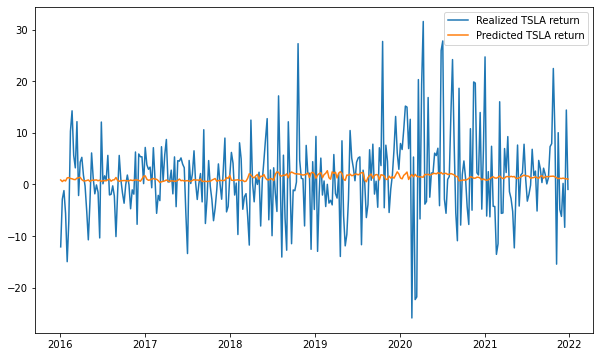

In [48]:
# in-sample forecast
plt.plot(Y, label='Realized TSLA return')
plt.plot(Y.index, res.predict(), label='Predicted TSLA return') # predict함수 호출하면 fitting 결과
plt.legend()
plt.show()
#res.predict()는 numpy vector라 X축을 Y의 index로 지정해줘야

In [49]:
last_obs = df_use.iloc[-1]

last_WMT = df_stocks.loc['2021-12-27']['WMT']

real_WMT = df_stocks.loc['2022-01-28']['WMT'] # DAR 리밸런싱 1달 주기 예상

exog = last_obs[["WMT_L6",'WMT_skew','WMT_RVIV']] 

exog = [1, *exog] 

pred_ret = res.predict(exog=exog)

pred_price = last_WMT * (1 + pred_ret[0]/100)

actual_ret = (real_WMT/last_WMT-1)*100

print("Predicted Return is : {:.2f}".format(pred_ret[0]))
print("Current Stock Price is : {:.2f}".format(last_WMT))
print("Predicted Stock Price for 2021 Jan is : {:.2f}".format(pred_price))
print("Real Stock Price for 2021 Jan was : {:.2f}".format(real_WMT))
print("Return Could have been : {:.2f}%".format(actual_ret))

Predicted Return is : 0.28
Current Stock Price is : 140.76
Predicted Stock Price for 2021 Jan is : 141.15
Real Stock Price for 2021 Jan was : 137.52
Return Could have been : -2.30%


## Apply to all stocks

In [50]:
col = df_use.columns
col[:25]

Index(['ATVI_L6', 'AMZN_L6', 'AAPL_L6', 'BA_L6', 'KO_L6', 'DIS_L6', 'XOM_L6',
       'F_L6', 'GE_L6', 'GS_L6', 'INTC_L6', 'MCD_L6', 'MSFT_L6', 'NVDA_L6',
       'PFE_L6', 'SBUX_L6', 'UNH_L6', 'WMT_L6', 'ELV_L6', 'GOOGL_L6',
       'TSLA_L6', 'GM_L6', 'META_L6', 'AAL_L6', 'BABA_L6'],
      dtype='object')

In [51]:
F_ret

,ATVI_weekly,AMZN_weekly,AAPL_weekly,BA_weekly,KO_weekly,DIS_weekly,XOM_weekly,F_weekly,GE_weekly,GS_weekly,...,SBUX_weekly,UNH_weekly,WMT_weekly,ELV_weekly,GOOGL_weekly,TSLA_weekly,GM_weekly,META_weekly,AAL_weekly,BABA_weekly
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-03,-7.749936,-10.185082,-7.885239,-10.097511,-3.375235,-5.548155,-4.182161,-11.000711,-8.667735,-9.038447,...,-5.663831,-6.358378,3.654163,-5.242396,-6.053905,-12.086997,-13.172590,-7.003632,-4.675324,-12.882975
2016-01-10,-2.240267,-6.073635,0.175328,-3.354110,-0.024087,-5.390427,3.869326,-4.545452,0.140591,-5.081128,...,2.419210,-0.807922,-2.533838,2.164535,-2.793777,-2.848332,0.135452,-2.424741,-3.988112,-1.709049
2016-01-17,2.893149,4.595038,4.416762,-0.811905,1.349401,3.194888,-1.301885,1.420218,-0.877496,0.803290,...,2.017238,4.630736,1.227189,4.748491,4.921947,-1.190306,-0.980720,3.127305,3.611975,1.120860
2016-01-24,-3.062357,-1.572822,-4.022877,-3.595220,2.044690,-1.114553,1.671671,-1.647453,3.045327,2.996300,...,2.704077,0.725970,5.854207,-7.715692,2.131576,-5.603558,1.229504,14.570141,-2.913342,-4.746346
2016-01-31,-12.320503,-14.458261,-3.410725,2.022809,-1.118359,-2.003755,2.864487,-4.103851,-1.924399,-3.150530,...,-10.334044,-2.987150,0.964435,-5.448699,-7.564198,-14.958153,-3.711196,-7.254255,-5.745067,-6.549305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,-5.377760,-3.274873,3.207703,-0.361428,-0.353617,-1.276078,-0.587756,-3.088611,-5.181930,-1.710368,...,0.524123,2.139075,-5.100069,-4.938388,-0.127655,-6.188077,-0.764499,-7.889049,-6.366192,-16.040499
2021-12-05,2.161781,1.606296,10.881118,3.309986,5.117665,4.438521,3.481687,12.068973,4.505767,2.176465,...,4.935280,6.434168,2.559817,9.113924,4.225308,0.202964,5.861665,7.466433,8.363413,11.700606
2021-12-12,4.709901,-1.274304,-4.630815,-6.061637,2.576405,-2.586610,-4.729407,-7.832169,-5.673028,-2.367926,...,-6.939095,1.858935,-1.616676,3.271463,-4.240828,-8.304578,-12.735326,1.225173,-5.885616,-2.366863


In [52]:
buffer = []
buffer2 = []
for i in range(len(stock_list)): 
    col = df_use.columns 
    col1 = col[:25] #L6= [ :number of stocks]
    col2 = col[50:75] #skew [# stocks*2 : 앞+25]
    col3 = col[100:125] #RVIV [# stocks*4: 앞+25]
    test = [col1[i], col2[i], col3[i]]
    print(test)
    tick = test[0].split('_')[0]
    Xi = sm.add_constant(df_use[test])
    res =  sm.OLS(F_ret[tick+'_weekly'], Xi).fit()
    #print(res)
    buffer.append(res.params)
    buffer2.append(Xi.iloc[-1])

['ATVI_L6', 'ATVI_skew', 'ATVI_RVIV']
['AMZN_L6', 'AMZN_skew', 'AMZN_RVIV']
['AAPL_L6', 'AAPL_skew', 'AAPL_RVIV']
['BA_L6', 'BA_skew', 'BA_RVIV']
['KO_L6', 'KO_skew', 'KO_RVIV']
['DIS_L6', 'DIS_skew', 'DIS_RVIV']
['XOM_L6', 'XOM_skew', 'XOM_RVIV']
['F_L6', 'F_skew', 'F_RVIV']
['GE_L6', 'GE_skew', 'GE_RVIV']
['GS_L6', 'GS_skew', 'GS_RVIV']
['INTC_L6', 'INTC_skew', 'INTC_RVIV']
['MCD_L6', 'MCD_skew', 'MCD_RVIV']
['MSFT_L6', 'MSFT_skew', 'MSFT_RVIV']
['NVDA_L6', 'NVDA_skew', 'NVDA_RVIV']
['PFE_L6', 'PFE_skew', 'PFE_RVIV']
['SBUX_L6', 'SBUX_skew', 'SBUX_RVIV']
['UNH_L6', 'UNH_skew', 'UNH_RVIV']
['WMT_L6', 'WMT_skew', 'WMT_RVIV']
['ELV_L6', 'ELV_skew', 'ELV_RVIV']
['GOOGL_L6', 'GOOGL_skew', 'GOOGL_RVIV']
['TSLA_L6', 'TSLA_skew', 'TSLA_RVIV']
['GM_L6', 'GM_skew', 'GM_RVIV']
['META_L6', 'META_skew', 'META_RVIV']
['AAL_L6', 'AAL_skew', 'AAL_RVIV']
['BABA_L6', 'BABA_skew', 'BABA_RVIV']


In [53]:
buffer

[const        0.576237
 ATVI_L6      0.002899
 ATVI_skew   -0.106556
 ATVI_RVIV    0.028893
 dtype: float64,
 const       -0.453440
 AMZN_L6     -0.111818
 AMZN_skew    0.028335
 AMZN_RVIV   -0.012490
 dtype: float64,
 const        0.509223
 AAPL_L6     -0.137622
 AAPL_skew    0.006861
 AAPL_RVIV   -0.006612
 dtype: float64,
 const      1.038487
 BA_L6      0.280536
 BA_skew   -0.278276
 BA_RVIV    0.110400
 dtype: float64,
 const      1.096036
 KO_L6      0.406261
 KO_skew   -0.216000
 KO_RVIV    0.117813
 dtype: float64,
 const       1.113622
 DIS_L6      0.033958
 DIS_skew   -0.265238
 DIS_RVIV    0.075518
 dtype: float64,
 const       0.206832
 XOM_L6      0.090081
 XOM_skew   -0.069014
 XOM_RVIV    0.198998
 dtype: float64,
 const     0.868115
 F_L6      0.185272
 F_skew   -0.176693
 F_RVIV    0.056491
 dtype: float64,
 const     -0.260242
 GE_L6      0.111081
 GE_skew   -0.021073
 GE_RVIV    0.001244
 dtype: float64,
 const      2.338618
 GS_L6      0.170636
 GS_skew   -0.635242


In [54]:
df_loadings = pd.DataFrame(buffer, index = F_ret.columns)
df_loadings

,const,ATVI_L6,ATVI_skew,ATVI_RVIV,AMZN_L6,AMZN_skew,AMZN_RVIV,AAPL_L6,AAPL_skew,AAPL_RVIV,...,GM_RVIV,META_L6,META_skew,META_RVIV,AAL_L6,AAL_skew,AAL_RVIV,BABA_L6,BABA_skew,BABA_RVIV
ATVI_weekly,0.576237,0.002899,-0.106556,0.028893,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN_weekly,-0.453440,NaN,NaN,NaN,-0.111818,0.028335,-0.01249,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAPL_weekly,0.509223,NaN,NaN,NaN,NaN,NaN,NaN,-0.137622,0.006861,-0.006612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA_weekly,1.038487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO_weekly,1.096036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS_weekly,1.113622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XOM_weekly,0.206832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_weekly,0.868115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GE_weekly,-0.260242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GS_weekly,2.338618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_coef = df_loadings.copy()
for i in range(len(df_loadings)):
    df_coef.iloc[i, 1:4] = df_coef.iloc[i, 1+i*3 : 1+i*3+3]
    
df_coef = df_coef.iloc[:,0:4]
df_coef.rename(columns = {'AMZN_L6':'momentum', 'AMZN_skew':'skew','AMZN_RVIV':'RVIV'}, inplace = True)

df_coef

,const,ATVI_L6,ATVI_skew,ATVI_RVIV
ATVI_weekly,0.576237,0.002899,-0.106556,0.028893
AMZN_weekly,-0.453440,-0.111818,0.028335,-0.012490
AAPL_weekly,0.509223,-0.137622,0.006861,-0.006612
BA_weekly,1.038487,0.280536,-0.278276,0.110400
KO_weekly,1.096036,0.406261,-0.216000,0.117813
DIS_weekly,1.113622,0.033958,-0.265238,0.075518
XOM_weekly,0.206832,0.090081,-0.069014,0.198998
F_weekly,0.868115,0.185272,-0.176693,0.056491
GE_weekly,-0.260242,0.111081,-0.021073,0.001244
GS_weekly,2.338618,0.170636,-0.635242,0.117588


## Last Observation

In [56]:
df_last_obs = pd.DataFrame(buffer2, index=F_ret.columns)
df_last_merged = df_last_obs.copy()
for i in range(len(df_last_merged)):
    df_last_obs.iloc[i, 1:4] = df_last_obs.iloc[i, 1+i*3 : 1+i*3+3]
    
df_last_obs = df_last_obs.iloc[:,0:4]
df_last_obs.rename(columns = {'AMZN_L6':'momentum', 'AMZN_skew':'skew','AMZN_RVIV':'RVIV'}, inplace = True)

df_last_obs

,const,ATVI_L6,ATVI_skew,ATVI_RVIV
ATVI_weekly,1.0,-5.954590,1.277967,-11.780933
AMZN_weekly,1.0,1.034437,-15.584200,-119.572100
AAPL_weekly,1.0,1.211558,2.390733,7.081833
BA_weekly,1.0,-0.799753,1.952800,17.727200
KO_weekly,1.0,-1.181174,4.797167,11.216667
DIS_weekly,1.0,-3.145399,0.859800,1.776000
XOM_weekly,1.0,-1.243061,3.291867,1.628933
F_weekly,1.0,3.830071,0.060667,5.448100
GE_weekly,1.0,-1.644969,3.256533,7.812300
GS_weekly,1.0,-1.465137,3.604000,7.198800


In [59]:
buffer3 = []
for i in range(len(df_coef)):
    coef = df_coef.iloc[i]
    obs = df_last_obs.iloc[i]
    zzang = np.dot(coef, obs)
    buffer3.append(zzang)
buffer3

[0.08241003475603881,
 0.4828214722589518,
 0.31206554728885216,
 2.2277901950435655,
 0.9014480736007189,
 0.9128781401799155,
 0.19182627526274326,
 1.874768547594953,
 -0.5018689850641879,
 0.6456938741119402,
 0.3932028609525475,
 0.8618802987491399,
 1.1947145647377555,
 1.416244773413793,
 1.081186981094339,
 1.1011516045646388,
 0.6078971222050142,
 0.6400416675814177,
 2.3243096777561183,
 -1.2142853614255906,
 1.0389139668848038,
 2.728116865260649,
 1.3554798431600907,
 0.5148420302589652,
 0.6643995980681803]

## Prediction

In [60]:
df_prediction = pd.DataFrame(buffer3, index = F_ret.columns)
df_prediction.rename(columns = {0:'Predicted Return for Jaunary'}, inplace = True)
df_prediction['Actual Return'] = ''
df_prediction['temp'] = stock_list
df_prediction.set_index('temp',inplace=True)
stock_ret = df_stocks.loc['2021-01-01':'2021-01-12']
df_prediction['Actual Return'] = (stock_ret.iloc[-1]/stock_ret.iloc[0] - 1)*100
mean = df_prediction.mean(axis = 0)
print(df_prediction)
print()
print(mean)
print()
print("***************************************")
print("Prediction Error : {:.2f} % for a week".format(abs(mean[0]-mean[1])))

       Predicted Return for Jaunary  Actual Return
temp                                              
ATVI                       0.082410      -0.723027
AMZN                       0.482821      -2.064873
AAPL                       0.312066      -0.471371
BA                         2.227790       2.806828
KO                         0.901448      -5.022740
DIS                        0.912878      -0.951141
XOM                        0.191826      15.373497
F                          1.874769      14.788723
GE                        -0.501869      12.511933
GS                         0.645694      14.041506
INTC                       0.393203       7.187444
MCD                        0.861880       0.656457
MSFT                       1.194715      -1.267862
NVDA                       1.416245       2.831059
PFE                        1.081187       1.005159
SBUX                       1.101152      -0.271580
UNH                        0.607897       2.251787
WMT                        0.64

In [61]:
df_wav = df_prediction[df_prediction['Predicted Return for Jaunary']>0]
total_ret = df_wav['Predicted Return for Jaunary'].sum()
df_wav['weighted_avg'] = df_wav['Predicted Return for Jaunary'] / total_ret 
df_wav

<ipython-input-61-9592f195205b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wav['weighted_avg'] = df_wav['Predicted Return for Jaunary'] / total_ret


,Predicted Return for Jaunary,Actual Return,weighted_avg
temp,,,
ATVI,0.082410,-0.723027,0.003499
AMZN,0.482821,-2.064873,0.020498
AAPL,0.312066,-0.471371,0.013249
BA,2.227790,2.806828,0.094582
KO,0.901448,-5.022740,0.038271
DIS,0.912878,-0.951141,0.038757
XOM,0.191826,15.373497,0.008144
F,1.874769,14.788723,0.079594
GS,0.645694,14.041506,0.027413


#### List of stocks with positive return during our period of interest: bt_list

In [62]:
bt_list = df_wav.index

In [63]:
list(bt_list)

['ATVI',
 'AMZN',
 'AAPL',
 'BA',
 'KO',
 'DIS',
 'XOM',
 'F',
 'GS',
 'INTC',
 'MCD',
 'MSFT',
 'NVDA',
 'PFE',
 'SBUX',
 'UNH',
 'WMT',
 'ELV',
 'TSLA',
 'GM',
 'META',
 'AAL',
 'BABA']

In [64]:
for i in range(len(bt_list)):
    bt = pd.DataFrame(pdr.get_data_yahoo(bt_list[i],start='2020-12-29')['Close'])
    bt.columns = [bt_list[i]]
    
    if i== 0 :
        df_bt= bt
    else:
        df_bt = pd.concat([df_bt,bt],axis =1)
    
df_bt

,ATVI,AMZN,AAPL,BA,KO,DIS,XOM,F,GS,INTC,...,PFE,SBUX,UNH,WMT,ELV,TSLA,GM,META,AAL,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28,91.430000,164.197998,136.690002,216.089996,54.160000,178.860001,41.740002,8.89,259.589996,47.070000,...,36.820000,104.339996,345.950012,145.220001,312.890015,221.229996,41.660000,277.000000,16.059999,222.360001
2020-12-29,91.370003,166.100006,134.869995,216.250000,54.130001,177.300003,41.270000,8.82,258.010010,49.389999,...,37.049999,105.629997,347.350006,144.300003,314.329987,221.996674,41.570000,276.779999,15.860000,236.259995
2020-12-30,91.580002,164.292496,133.720001,216.669998,54.439999,181.169998,41.599998,8.86,259.450012,48.750000,...,36.740002,105.970001,344.989990,144.179993,314.049988,231.593338,41.840000,271.869995,16.150000,238.389999
2020-12-31,92.849998,162.846497,132.690002,214.059998,54.840000,181.179993,41.220001,8.79,263.709991,49.820000,...,36.810001,106.980003,350.679993,144.149994,321.089996,235.223328,41.639999,273.160004,15.770000,232.729996
2021-01-04,89.900002,159.331497,129.410004,202.720001,52.759998,177.679993,41.500000,8.52,265.000000,49.669998,...,36.810001,103.099998,349.500000,146.529999,318.579987,243.256668,40.509998,268.940002,15.130000,227.850006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22,79.760002,133.220001,167.570007,158.979996,64.199997,115.940002,94.010002,15.08,342.420013,33.840000,...,48.900002,84.949997,544.570007,134.570007,507.000000,289.913330,38.549999,163.050003,13.710000,90.029999
2022-08-23,79.339996,133.619995,167.229996,160.070007,64.269997,114.860001,98.000000,15.32,340.179993,33.950001,...,48.009998,84.690002,535.799988,134.000000,493.230011,296.453339,38.560001,161.110001,13.820000,89.830002
2022-08-24,79.279999,133.800003,167.529999,163.600006,64.360001,116.410004,98.580002,15.52,341.940002,33.860001,...,47.430000,86.050003,536.460022,134.970001,493.399994,297.096680,39.250000,163.259995,13.990000,92.519997


In [65]:
df_btm = df_bt.resample('M').last()
df_btret = df_btm.pct_change()*100
df_btret = df_btret.dropna()
df_btret

,ATVI,AMZN,AAPL,BA,KO,DIS,XOM,F,GS,INTC,...,PFE,SBUX,UNH,WMT,ELV,TSLA,GM,META,AAL,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,-1.992459,-1.557601,-0.550151,-9.282442,-12.199122,-7.180702,8.782142,19.795219,2.828873,11.421113,...,-2.472154,-9.506455,-4.876242,-2.539014,-7.508794,12.450586,21.709897,-5.429059,8.877613,9.066303
2021-02-28,5.065935,-3.532841,-8.108521,9.176575,1.744549,12.410058,21.253342,11.111112,17.815391,9.493786,...,-6.713091,11.589713,-0.407694,-7.523672,2.091047,-14.874045,1.282560,-0.274839,21.956904,-6.331012
2021-03-31,-2.729841,0.037178,0.733960,20.145280,7.593381,-2.391023,2.685310,4.700856,2.353821,5.297797,...,8.181540,1.147827,11.995065,4.548956,18.391111,-1.120657,11.942328,14.327305,14.135621,-4.639131
2021-04-30,-1.946234,12.066274,7.621781,-8.012721,2.409411,0.812920,2.525524,-5.795919,6.559637,-10.109377,...,6.679553,4.777159,7.184127,3.003756,5.694387,6.214725,-0.417678,10.372454,-9.121340,1.861245
2021-05-31,6.645463,-7.047026,-5.210715,5.424441,2.426827,-3.961945,1.974139,25.909877,6.764235,-0.712671,...,0.206981,-0.532798,3.289876,1.515256,4.963227,-11.871336,3.652569,1.122808,11.602212,-7.356567
2021-06-30,-1.861180,6.735499,9.910927,-3.020001,-2.134202,-1.612085,8.069219,2.271163,2.018711,-1.715686,...,1.110251,-1.817703,-2.786951,-0.711114,-4.123352,8.713735,-0.236053,5.773729,-12.500003,5.991770
2021-07-31,-12.384744,-3.272228,6.498243,-5.460011,5.396411,0.142231,-8.734943,-6.123821,-1.225198,-4.310649,...,9.320739,8.603884,2.941764,1.084952,0.578843,1.103428,-3.937803,2.470449,-3.913248,-13.929798
2021-08-31,-1.494858,4.303417,4.092967,-3.081948,-1.262489,2.999658,-5.297897,-6.594983,10.304632,0.632912,...,7.615039,-3.244670,0.982482,3.893373,-2.312441,7.060538,-13.775513,6.477692,-2.158973,-14.447460
2021-09-30,-6.045894,-5.351811,-6.803663,0.200457,-6.819393,-6.690571,7.887012,8.672296,-8.580206,-1.442846,...,-6.642069,-6.111159,-6.133039,-5.887914,-0.621123,5.404233,7.549482,-10.540880,2.908726,-11.341998


In [68]:
# bench = pdr.get_data_yahoo('DJI', start='2020-12-29')
# bench = bench['Close'].resample('M').last()
# bench = bench.pct_change()*100
# bench = bench.cumsum()

RemoteDataError: No data fetched for symbol DJI^ using YahooDailyReader

In [ ]:
# ret_c = np.zeros(len(df_btret))
# for y in range(1,len(df_btret)):
#     ret_c[y-1] = df_wav['weighted_avg'] @ df_btret.iloc[y] 
#     ret_cs = pd.Series(ret_c)
#     ret_cs = ret_cs.cumsum()
#     if y == 1:
#         print("DAR targeting 1 month")
        
#     elif y == 3:
#         print("KSIF Rebalancing Period")
        
# print("If held for {} month, return could have been {:.2f}% vs DJI was {:.2f}%".format(y,ret_cs.iloc[y], bench.iloc[y]))

## Recent Data

In [86]:
new_data = pd.read_csv('2022_08_25_Option_Skew.csv')

In [87]:
new_data['Date'] = '2022-08-24'
new_data = new_data.set_index(pd.to_datetime(new_data['Date']))
del new_data['Date']
del new_data['Current_S']
del new_data['ATMC_K']
del new_data['OTMP_K']
new_data

,Ticker,IV_ATM_C,IV_OTM_P,Skew
Date,,,,
2022-08-24,AAL,62.097128,63.808355,1.711227
2022-08-24,AAPL,31.095312,35.354152,4.258840
2022-08-24,AMZN,45.754531,47.448800,1.694269
2022-08-24,ATVI,19.724793,28.173737,8.448944
2022-08-24,BA,45.551073,49.291779,3.740706
2022-08-24,BABA,62.423048,62.954891,0.531843
2022-08-24,BRK-B,23.309915,30.096780,6.786866
2022-08-24,DIS,35.109037,37.861695,2.752659
2022-08-24,ELV,30.149095,36.077800,5.928705


In [88]:
new_data.dtypes

Ticker       object
IV_ATM_C    float64
IV_OTM_P    float64
Skew        float64
dtype: object

In [89]:
new_data = new_data.replace(',', '', regex=True)
new_data = new_data.astype({'IV_ATM_C': 'float', 'Skew': 'float'})

In [90]:
last_week = new_data.loc['2022-08-22':].groupby('Ticker').mean().dropna(axis=1)
stock_list3 = new_data.Ticker.unique()
stock_list3
# .groupby('Ticker').mean().dropna()

array(['AAL', 'AAPL', 'AMZN', 'ATVI', 'BA', 'BABA', 'BRK-B', 'DIS', 'ELV',
       'F', 'GE', 'GM', 'GOOGL', 'GS', 'INTC', 'KO', 'MCD', 'META',
       'MSFT', 'NVDA', 'PFE', 'SBUX', 'TSLA', 'UNH', 'WMT', 'XOM'],
      dtype=object)

In [91]:
stock_set = set(stock_list)
stock_set

{'AAL',
 'AAPL',
 'AMZN',
 'ATVI',
 'BA',
 'BABA',
 'DIS',
 'ELV',
 'F',
 'GE',
 'GM',
 'GOOGL',
 'GS',
 'INTC',
 'KO',
 'MCD',
 'META',
 'MSFT',
 'NVDA',
 'PFE',
 'SBUX',
 'TSLA',
 'UNH',
 'WMT',
 'XOM'}

In [92]:
excel_set= set(last_week.index)
excel_set

{'AAL',
 'AAPL',
 'AMZN',
 'ATVI',
 'BA',
 'BABA',
 'BRK-B',
 'DIS',
 'ELV',
 'F',
 'GE',
 'GM',
 'GOOGL',
 'GS',
 'INTC',
 'KO',
 'MCD',
 'META',
 'MSFT',
 'NVDA',
 'PFE',
 'SBUX',
 'TSLA',
 'UNH',
 'WMT',
 'XOM'}

In [93]:
minus = excel_set-stock_set
minus

{'BRK-B'}

In [94]:
for i in minus:
    last_week = last_week.drop(i)

In [95]:
stock_list3 = last_week.index
stock_list3

Index(['AAL', 'AAPL', 'AMZN', 'ATVI', 'BA', 'BABA', 'DIS', 'ELV', 'F', 'GE',
       'GM', 'GOOGL', 'GS', 'INTC', 'KO', 'MCD', 'META', 'MSFT', 'NVDA', 'PFE',
       'SBUX', 'TSLA', 'UNH', 'WMT', 'XOM'],
      dtype='object', name='Ticker')

In [96]:
last_week

,IV_ATM_C,IV_OTM_P,Skew
Ticker,,,
AAL,62.097128,63.808355,1.711227
AAPL,31.095312,35.354152,4.258840
AMZN,45.754531,47.448800,1.694269
ATVI,19.724793,28.173737,8.448944
BA,45.551073,49.291779,3.740706
BABA,62.423048,62.954891,0.531843
DIS,35.109037,37.861695,2.752659
ELV,30.149095,36.077800,5.928705
F,49.972090,51.783599,1.811508


In [98]:
df_last_week = pdr.get_data_yahoo(stock_list, start='2022-08-01', end='2022-08-27')['Close'] # at least 20 days before
df_last_week

Symbols,ATVI,AMZN,AAPL,BA,KO,DIS,XOM,F,GE,GS,...,SBUX,UNH,WMT,ELV,GOOGL,TSLA,GM,META,AAL,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,80.080002,135.389999,161.509995,169.070007,64.519997,106.220001,94.480003,15.340000,75.800003,332.079987,...,84.910004,535.380005,132.539993,470.899994,114.860001,297.276672,36.770000,159.929993,14.28,90.339996
2022-08-02,79.320000,134.160004,160.009995,163.279999,63.639999,104.709999,94.070000,15.160000,74.360001,327.880005,...,83.709999,535.460022,132.679993,472.140015,115.129997,300.586670,36.130001,160.190002,14.06,92.620003
2022-08-03,80.589996,139.520004,166.130005,166.639999,63.919998,109.019997,91.019997,15.690000,74.739998,333.170013,...,87.269997,540.650024,130.500000,479.529999,118.080002,307.396667,37.310001,168.800003,14.63,95.720001
2022-08-04,80.660004,142.570007,165.809998,166.500000,63.669998,108.120003,87.190002,15.370000,73.669998,331.869995,...,86.879997,533.750000,125.570000,474.899994,118.190002,308.633331,36.230000,170.570007,14.86,97.430000
2022-08-05,80.489998,140.800003,165.350006,165.039993,63.380001,106.629997,88.449997,15.300000,74.360001,334.670013,...,85.730003,535.059998,126.580002,475.130005,117.470001,288.170013,36.060001,167.110001,14.74,92.559998
2022-08-08,81.000000,139.410004,164.869995,165.889999,62.970001,109.110001,88.949997,15.780000,75.180000,334.679993,...,85.720001,536.599976,127.610001,475.720001,117.300003,290.423340,37.560001,170.250000,15.02,90.839996
2022-08-09,80.589996,137.830002,164.919998,164.850006,63.049999,108.129997,90.589996,15.190000,74.930000,336.619995,...,84.839996,537.260010,128.869995,483.970001,116.629997,283.333344,36.619999,168.529999,14.62,91.190002
2022-08-10,80.910004,142.690002,169.240005,169.020004,63.650002,112.430000,91.449997,15.500000,77.139999,347.910004,...,86.489998,537.719971,129.139999,481.329987,119.699997,294.356659,37.950001,178.339996,15.07,92.430000
2022-08-11,80.510002,140.639999,168.490005,167.880005,63.220001,117.690002,93.190002,15.830000,78.900002,351.679993,...,87.269997,532.859985,129.820007,477.109985,118.839996,286.630005,38.459999,177.490005,14.99,94.870003


In [99]:
trading_days = len(df_last_week.index)
trading_days

20

In [100]:
def get_realized_vol(time, ticker, dataset = df_last_week):
    dataset['returns'] = np.log(dataset[ticker]/dataset[ticker].shift(1))
    dataset.fillna(0, inplace = True)
    #window/time tells us how many days out vol you want. ~21 = 1 month out vol (~21 trading days in a month)
    #we do this so we can match up with the vix which is the 30 day out (~21 trading day) calculated vol
    volatility = dataset.returns.rolling(window=time).std(ddof=0)*np.sqrt(252)
    return pd.DataFrame(volatility).dropna()

In [101]:
dfs3 = []
for stock3 in stock_list3:
    test3 = get_realized_vol(trading_days, stock3)*100
    test3.columns = [stock3]
    dfs3.append(test3)
#     print(dfs3)
dfs3

[                  AAL
 Date                 
 2022-08-26  39.747807,
                  AAPL
 Date                 
 2022-08-26  25.708685,
                  AMZN
 Date                 
 2022-08-26  35.443785,
                 ATVI
 Date                
 2022-08-26  8.637478,
                    BA
 Date                 
 2022-08-26  31.644634,
                  BABA
 Date                 
 2022-08-26  42.382841,
                   DIS
 Date                 
 2022-08-26  36.943324,
                   ELV
 Date                 
 2022-08-26  20.526168,
                     F
 Date                 
 2022-08-26  37.963922,
                    GE
 Date                 
 2022-08-26  29.318799,
                   GM
 Date                
 2022-08-26  36.10028,
                 GOOGL
 Date                 
 2022-08-26  30.401337,
                    GS
 Date                 
 2022-08-26  21.175799,
                  INTC
 Date                 
 2022-08-26  32.100127,
                    KO
 Da

In [102]:
df_real_vol3 = pd.concat(dfs3, axis=1)
df_real_vol3.iloc[-1]

AAL      39.747807
AAPL     25.708685
AMZN     35.443785
ATVI      8.637478
BA       31.644634
BABA     42.382841
DIS      36.943324
ELV      20.526168
F        37.963922
GE       29.318799
GM       36.100280
GOOGL    30.401337
GS       21.175799
INTC     32.100127
KO       14.018144
MCD      14.155952
META     41.394781
MSFT     24.465150
NVDA     59.976925
PFE      23.615966
SBUX     27.389661
TSLA     41.296793
UNH      14.782989
WMT      28.682486
XOM      29.612024
Name: 2022-08-26 00:00:00, dtype: float64

In [103]:
rv_last_week = pd.DataFrame(df_real_vol3.iloc[-1])
rv_last_week

,2022-08-26
AAL,39.747807
AAPL,25.708685
AMZN,35.443785
ATVI,8.637478
BA,31.644634
BABA,42.382841
DIS,36.943324
ELV,20.526168
F,37.963922
GE,29.318799


In [104]:
last_week

,IV_ATM_C,IV_OTM_P,Skew
Ticker,,,
AAL,62.097128,63.808355,1.711227
AAPL,31.095312,35.354152,4.258840
AMZN,45.754531,47.448800,1.694269
ATVI,19.724793,28.173737,8.448944
BA,45.551073,49.291779,3.740706
BABA,62.423048,62.954891,0.531843
DIS,35.109037,37.861695,2.752659
ELV,30.149095,36.077800,5.928705
F,49.972090,51.783599,1.811508


In [105]:
df_real_vol3

,AAL,AAPL,AMZN,ATVI,BA,BABA,DIS,ELV,F,GE,...,MCD,META,MSFT,NVDA,PFE,SBUX,TSLA,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-26,39.747807,25.708685,35.443785,8.637478,31.644634,42.382841,36.943324,20.526168,37.963922,29.318799,...,14.155952,41.394781,24.46515,59.976925,23.615966,27.389661,41.296793,14.782989,28.682486,29.612024


In [106]:
last_week['RV'] = rv_last_week

In [107]:
last_week['RVIV'] = last_week['RV'] - last_week['IV_ATM_C']

In [108]:
last_week

,IV_ATM_C,IV_OTM_P,Skew,RV,RVIV
Ticker,,,,,
AAL,62.097128,63.808355,1.711227,39.747807,-22.349321
AAPL,31.095312,35.354152,4.258840,25.708685,-5.386627
AMZN,45.754531,47.448800,1.694269,35.443785,-10.310747
ATVI,19.724793,28.173737,8.448944,8.637478,-11.087315
BA,45.551073,49.291779,3.740706,31.644634,-13.906439
BABA,62.423048,62.954891,0.531843,42.382841,-20.040207
DIS,35.109037,37.861695,2.752659,36.943324,1.834288
ELV,30.149095,36.077800,5.928705,20.526168,-9.622927
F,49.972090,51.783599,1.811508,37.963922,-12.008168


In [109]:
df_last_week.pct_change(periods=5).shift(6).iloc[-1]

Symbols
ATVI      -0.000869
AMZN       0.011803
AAPL       0.033592
BA         0.004825
KO         0.031636
DIS        0.042315
XOM        0.012770
F          0.020215
GE         0.003929
GS         0.008076
INTC       0.017140
MCD        0.028155
MSFT       0.010975
NVDA       0.046316
PFE        0.006005
SBUX       0.014667
UNH        0.023196
WMT        0.071252
ELV        0.030727
GOOGL      0.011192
TSLA       0.056658
GM         0.006760
META      -0.015945
AAL       -0.010007
BABA      -0.043533
returns    0.239863
Name: 2022-08-26 00:00:00, dtype: float64

In [110]:
L6_last_week = pd.DataFrame(df_last_week.pct_change(periods=5).shift(6).iloc[-1]*100)

In [111]:
last_week['Momentum'] = L6_last_week

In [112]:
del last_week['IV_ATM_C']
del last_week['IV_OTM_P']
del last_week['RV']

In [113]:
last_week

,Skew,RVIV,Momentum
Ticker,,,
AAL,1.711227,-22.349321,-1.000665
AAPL,4.258840,-5.386627,3.359243
AMZN,1.694269,-10.310747,1.180321
ATVI,8.448944,-11.087315,-0.086945
BA,3.740706,-13.906439,0.482486
BABA,0.531843,-20.040207,-4.353331
DIS,2.752659,1.834288,4.231452
ELV,5.928705,-9.622927,3.072668
F,1.811508,-12.008168,2.021476


In [114]:
last_week = last_week[['Momentum','Skew','RVIV']]
last_week = sm.add_constant(last_week).copy()
last_week

,const,Momentum,Skew,RVIV
Ticker,,,,
AAL,1.0,-1.000665,1.711227,-22.349321
AAPL,1.0,3.359243,4.258840,-5.386627
AMZN,1.0,1.180321,1.694269,-10.310747
ATVI,1.0,-0.086945,8.448944,-11.087315
BA,1.0,0.482486,3.740706,-13.906439
BABA,1.0,-4.353331,0.531843,-20.040207
DIS,1.0,4.231452,2.752659,1.834288
ELV,1.0,3.072668,5.928705,-9.622927
F,1.0,2.021476,1.811508,-12.008168


In [115]:
df_coef_sort = df_coef.sort_index()
df_coef_sort

,const,ATVI_L6,ATVI_skew,ATVI_RVIV
AAL_weekly,0.931973,0.076683,-0.345003,0.031050
AAPL_weekly,0.509223,-0.137622,0.006861,-0.006612
AMZN_weekly,-0.453440,-0.111818,0.028335,-0.012490
ATVI_weekly,0.576237,0.002899,-0.106556,0.028893
BABA_weekly,1.924275,-0.017415,-0.688476,0.095881
BA_weekly,1.038487,0.280536,-0.278276,0.110400
DIS_weekly,1.113622,0.033958,-0.265238,0.075518
ELV_weekly,3.250595,-0.153761,-0.765007,0.082342
F_weekly,0.868115,0.185272,-0.176693,0.056491
GE_weekly,-0.260242,0.111081,-0.021073,0.001244


In [116]:
sort_order = []
for i in df_coef_sort.index:
    tick = i.split('_')[0]
    sort_order.append(tick)
sort_order

['AAL',
 'AAPL',
 'AMZN',
 'ATVI',
 'BABA',
 'BA',
 'DIS',
 'ELV',
 'F',
 'GE',
 'GM',
 'GOOGL',
 'GS',
 'INTC',
 'KO',
 'MCD',
 'META',
 'MSFT',
 'NVDA',
 'PFE',
 'SBUX',
 'TSLA',
 'UNH',
 'WMT',
 'XOM']

In [117]:
last_week = last_week.sort_index().dropna() #drop moderna
last_week.index

Index(['AAL', 'AAPL', 'AMZN', 'ATVI', 'BA', 'BABA', 'DIS', 'ELV', 'F', 'GE',
       'GM', 'GOOGL', 'GS', 'INTC', 'KO', 'MCD', 'META', 'MSFT', 'NVDA', 'PFE',
       'SBUX', 'TSLA', 'UNH', 'WMT', 'XOM'],
      dtype='object', name='Ticker')

In [118]:
#coef 와 ticker 순서 똑같이 유지
last_week = last_week.loc[sort_order]
last_week

,const,Momentum,Skew,RVIV
Ticker,,,,
AAL,1.0,-1.000665,1.711227,-22.349321
AAPL,1.0,3.359243,4.258840,-5.386627
AMZN,1.0,1.180321,1.694269,-10.310747
ATVI,1.0,-0.086945,8.448944,-11.087315
BABA,1.0,-4.353331,0.531843,-20.040207
BA,1.0,0.482486,3.740706,-13.906439
DIS,1.0,4.231452,2.752659,1.834288
ELV,1.0,3.072668,5.928705,-9.622927
F,1.0,2.021476,1.811508,-12.008168


In [119]:
buffer4 = []
for i in range(len(df_coef_sort)):
    coef = df_coef_sort.iloc[i]
    obs = last_week.iloc[i]
    zzang = np.dot(coef, obs)
    buffer4.append(zzang)

last_pred = pd.DataFrame(buffer4, index = last_week.index)

### 1주일 뒤 예상 수익률

In [121]:
df = last_pred.sort_values(by = 0, ascending=False)
df = df.rename(columns = {0:'Pred'})
df = df[df>=0].dropna() # Long Only
df = df.iloc[1:]
df

,Pred
Ticker,
NVDA,1.371548
DIS,0.665729
GOOGL,0.572291
TSLA,0.400939
KO,0.267332
F,0.244206
AAPL,0.111750
MSFT,0.085051


### 종목별 비중

In [122]:
df = round(df/df.Pred.sum()*100,3)
df

,Pred
Ticker,
NVDA,36.881
DIS,17.901
GOOGL,15.389
TSLA,10.781
KO,7.189
F,6.567
AAPL,3.005
MSFT,2.287


In [123]:
df.sum()

Pred    100.0
dtype: float64